In [55]:
import pandas as pd

# Ruta al archivo CSV
csv_file_path = r'C:\Users\kikot\Desktop\TFM GOLF\DF_Definitivo.csv'

# Cargar el archivo CSV en un DataFrame
data_frame = pd.read_csv(csv_file_path)

# Mostrar las primeras filas del DataFrame
data_frame.head()

PLAYER_ID        PLAYER_NAME  TOTAL_ROUNDS AVG_FAIRWAY AVG_SCRAMBLING  \
0      29221       Webb Simpson            52       67.42          64.47   
1      46970           Jon Rahm            58       63.16          64.52   
2      33448      Justin Thomas            66       57.53          63.16   
3      28237       Rory McIlroy            60       55.73          60.63   
4      48081  Xander Schauffele            70        59.6          66.49   

   AVG_TOTAL_FOR_ROUND  AVG_DRIVER_DISTANCE  AVG_SG_APPROACH AVG_GIR  \
0               68.978                296.2            0.640   70.83   
1               69.127                307.6            0.283   70.31   
2               69.128                304.2            0.997   69.61   
3               69.219                314.0            0.504   67.78   
4               69.227                305.4            0.366   70.87   

   AVG_PUTT  ...  AVG_SG_TOTAL  AVG_SG_TTG  PAR_5_AVG  PAR_4_AVG  PAR_3_AVG  \
0     1.691  ...         1.597       1.007       4.52       3.89       2.97   
1     1.717  ...         1.823       1.344       4.46       3.95       2.99   
2     1.722  ...         1.709       1.741       4.48       3.93       3.04   
3     1.738  ...         1.243       1.314       4.54       3.96       3.01   
4     1.737  ...         1.605       1.239       4.45       3.94       3.09   

   WINS  TOP10  YEAR  FEDEX_POINTS     MONEY  
0   2.0    8.0  2019        1878.0  $5097742  
1   2.0    8.0  2019        1295.0  $5959819  
2   3.0   10.0  2019        2458.0  $7344040  
3   1.0    7.0  2019        1327.0  $4408415  
4   0.0    7.0  2019        1258.0  $3813636  

[5 rows x 22 columns]

In [56]:
num_rows, num_columns = data_frame.shape
print("Número de filas:", num_rows)
print("Número de columnas:", num_columns)

Número de filas: 768
Número de columnas: 22


In [57]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PLAYER_ID            768 non-null    int64  
 1   PLAYER_NAME          768 non-null    object 
 2   TOTAL_ROUNDS         768 non-null    int64  
 3   AVG_FAIRWAY          768 non-null    object 
 4   AVG_SCRAMBLING       768 non-null    object 
 5   AVG_TOTAL_FOR_ROUND  768 non-null    float64
 6   AVG_DRIVER_DISTANCE  768 non-null    float64
 7   AVG_SG_APPROACH      768 non-null    float64
 8   AVG_GIR              768 non-null    object 
 9   AVG_PUTT             768 non-null    float64
 10  AVG_SG_ATG           768 non-null    float64
 11  AVG_SG_PUTTING       768 non-null    float64
 12  AVG_SG_TOTAL         768 non-null    float64
 13  AVG_SG_TTG           768 non-null    float64
 14  PAR_5_AVG            768 non-null    float64
 15  PAR_4_AVG            768 non-null    flo

In [59]:
data_frame['MONEY'] = data_frame['MONEY'].str.replace('$', '').astype(float) #Eliminamoss el simbolo del $ para no tener problemas
data_frame['MONEY'] = data_frame['MONEY'].astype(int) # Que no tenga decimales para hacer bbien los calculos

In [60]:
import matplotlib.pyplot as plt

# Establecemos el fondo de los gráficos como blanco ya que nos ha dado problemas diferentes graficos
plt.rcParams['axes.facecolor'] = 'white'

In [61]:
# Convertimos las columnas a tipo int64
columns_to_convert = ['TOP10', 'WINS', 'TOTAL_ROUNDS', 'FEDEX_POINTS', 'MONEY' ]
data_frame[columns_to_convert] = data_frame[columns_to_convert].astype('int64')

# Vamos a ver como queda nuestro data_frame
print(data_frame.dtypes)

PLAYER_ID                int64
PLAYER_NAME             object
TOTAL_ROUNDS             int64
AVG_FAIRWAY             object
AVG_SCRAMBLING          object
AVG_TOTAL_FOR_ROUND    float64
AVG_DRIVER_DISTANCE    float64
AVG_SG_APPROACH        float64
AVG_GIR                 object
AVG_PUTT               float64
AVG_SG_ATG             float64
AVG_SG_PUTTING         float64
AVG_SG_TOTAL           float64
AVG_SG_TTG             float64
PAR_5_AVG              float64
PAR_4_AVG              float64
PAR_3_AVG              float64
WINS                     int64
TOP10                    int64
YEAR                     int64
FEDEX_POINTS             int64
MONEY                    int64
dtype: object


In [62]:
# Lista de columnas que contienen caracteres de porcentaje
columns_with_percentage = ['AVG_FAIRWAY', 'AVG_SCRAMBLING', 'AVG_GIR']

# Iterar a través de las columnas y eliminar los caracteres de porcentaje
for column in columns_with_percentage:
    data_frame[column] = data_frame[column].str.replace('%', '').astype(float)

# Mostrar información del DataFrame actualizado
print(data_frame.dtypes)

PLAYER_ID                int64
PLAYER_NAME             object
TOTAL_ROUNDS             int64
AVG_FAIRWAY            float64
AVG_SCRAMBLING         float64
AVG_TOTAL_FOR_ROUND    float64
AVG_DRIVER_DISTANCE    float64
AVG_SG_APPROACH        float64
AVG_GIR                float64
AVG_PUTT               float64
AVG_SG_ATG             float64
AVG_SG_PUTTING         float64
AVG_SG_TOTAL           float64
AVG_SG_TTG             float64
PAR_5_AVG              float64
PAR_4_AVG              float64
PAR_3_AVG              float64
WINS                     int64
TOP10                    int64
YEAR                     int64
FEDEX_POINTS             int64
MONEY                    int64
dtype: object


Como excplicare mas adelante hay diferentes estadisticas que cuanto menor sea el valor es mejor, ya que reflejan menos numeros de golpe,
para ello lo que voy ahacer es cionvertir todos esos numeros en negativo para que me encaje mejor con el analisis estadistico

In [63]:

# Convertir los valores de las columnas a negativos
columns_to_convert = ['PAR_4_AVG', 'PAR_5_AVG', 'PAR_3_AVG', 'AVG_TOTAL_FOR_ROUND', 'AVG_PUTT']
data_frame[columns_to_convert] = -data_frame[columns_to_convert]

# Verificamos los cambios
print(data_frame.head())


   PLAYER_ID        PLAYER_NAME  TOTAL_ROUNDS  AVG_FAIRWAY  AVG_SCRAMBLING  \
0      29221       Webb Simpson            52        67.42           64.47   
1      46970           Jon Rahm            58        63.16           64.52   
2      33448      Justin Thomas            66        57.53           63.16   
3      28237       Rory McIlroy            60        55.73           60.63   
4      48081  Xander Schauffele            70        59.60           66.49   

   AVG_TOTAL_FOR_ROUND  AVG_DRIVER_DISTANCE  AVG_SG_APPROACH  AVG_GIR  \
0              -68.978                296.2            0.640    70.83   
1              -69.127                307.6            0.283    70.31   
2              -69.128                304.2            0.997    69.61   
3              -69.219                314.0            0.504    67.78   
4              -69.227                305.4            0.366    70.87   

   AVG_PUTT  ...  AVG_SG_TOTAL  AVG_SG_TTG  PAR_5_AVG  PAR_4_AVG  PAR_3_AVG  \
0    -1.691  

# 1 - ANALISIS DEL DATO

1.1 ANALISIS DE LA DISTRIBUCION DE LOS DATOS (LA NECESIDAD DE NORMALIDAD)

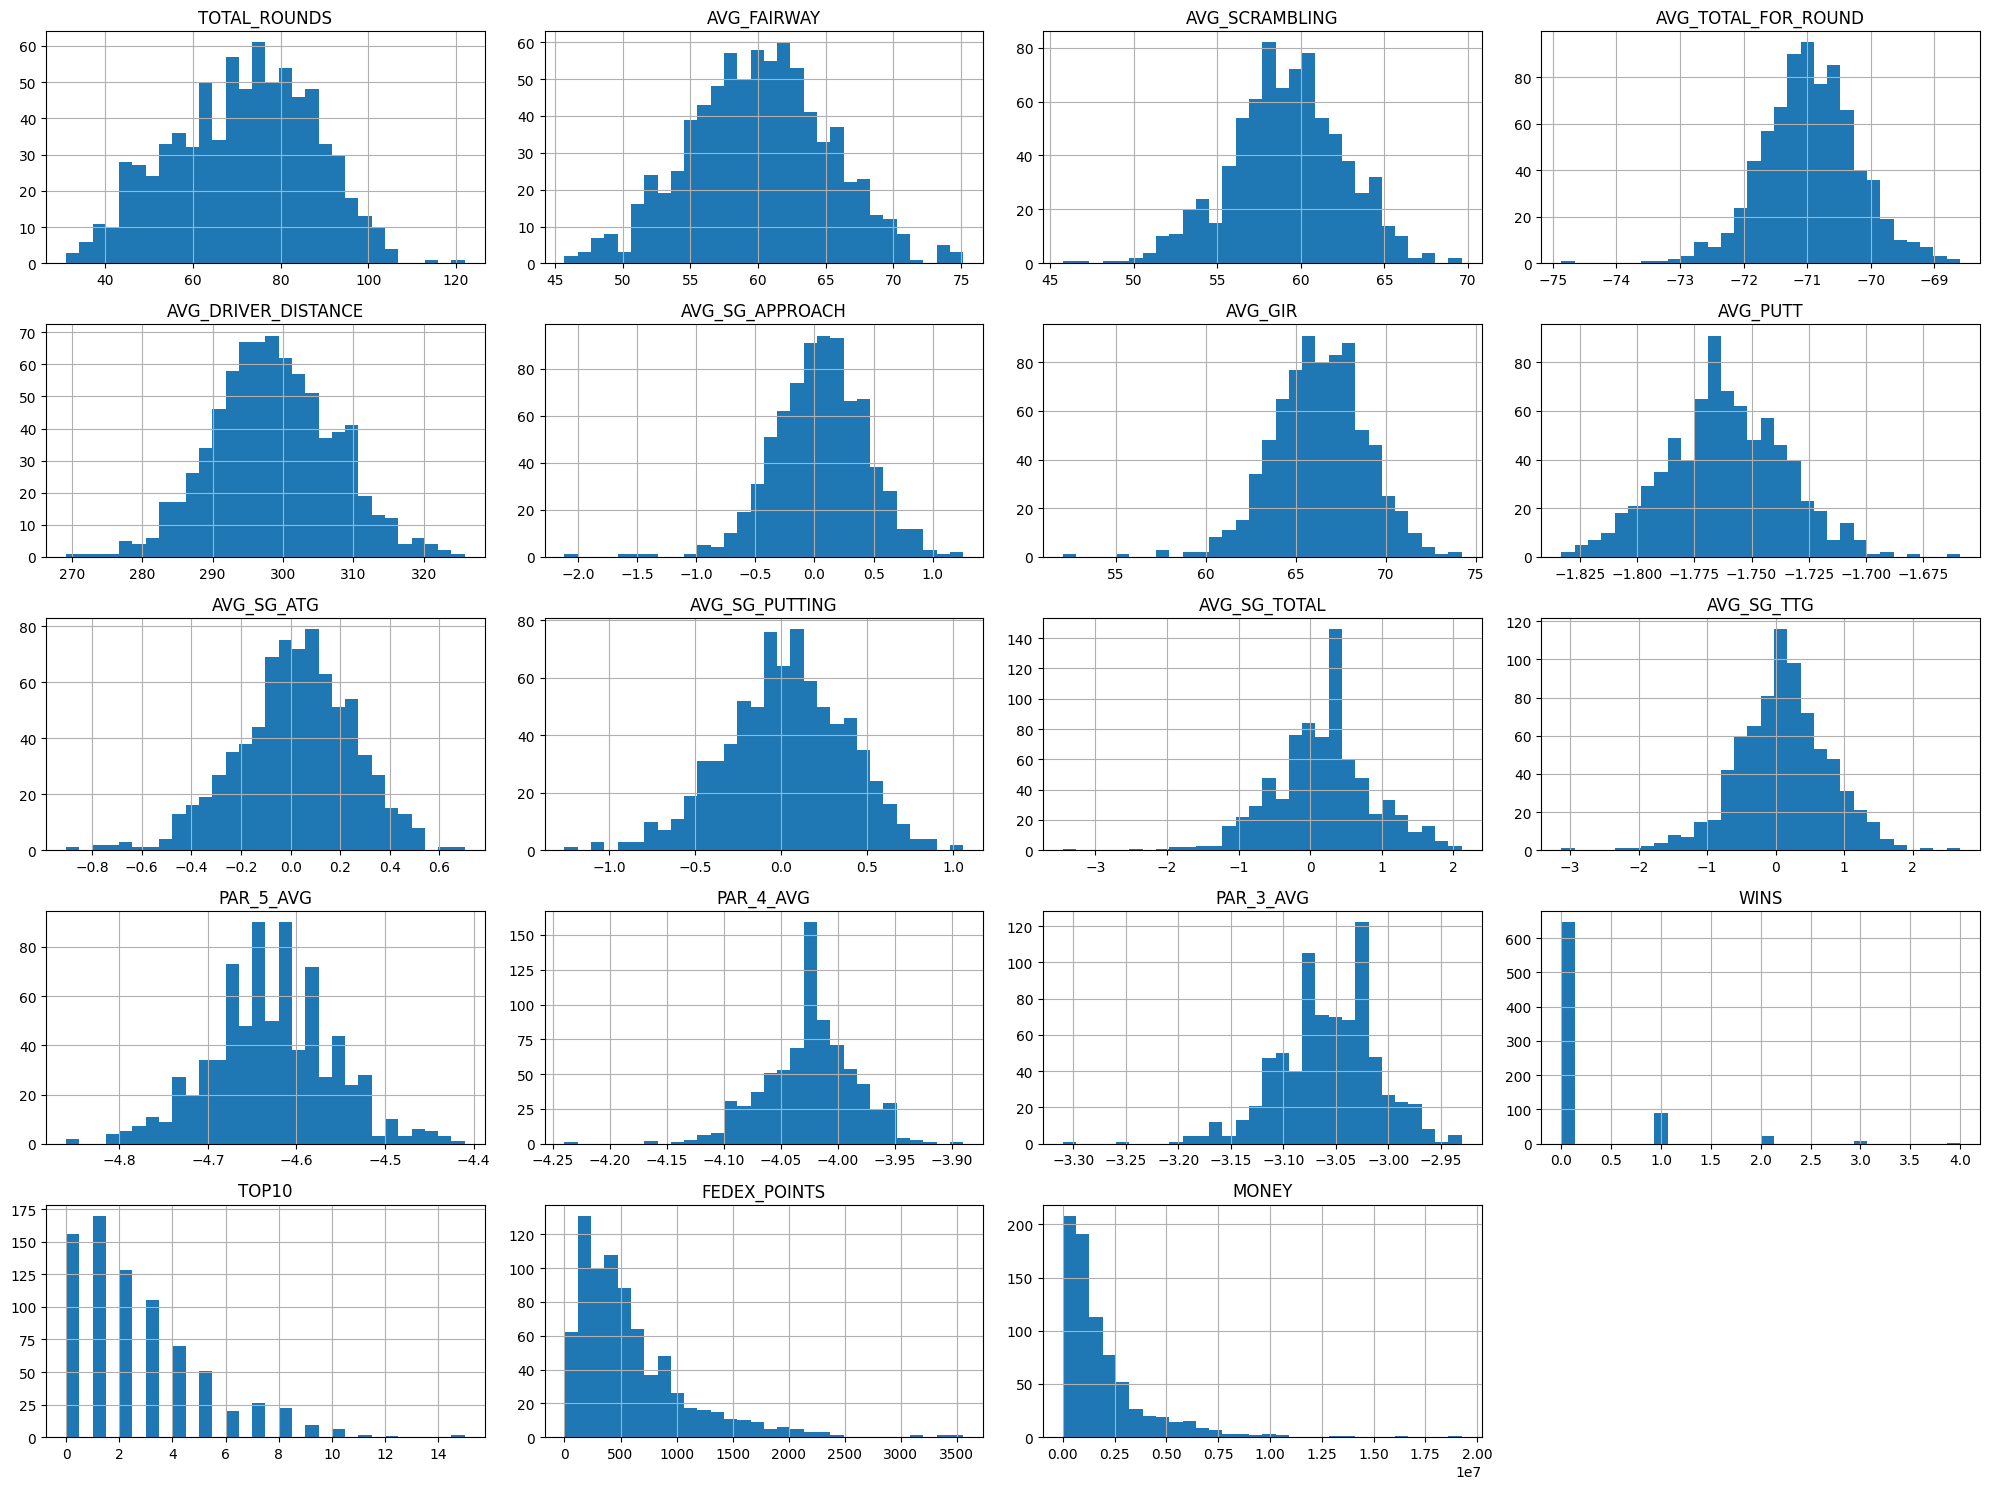

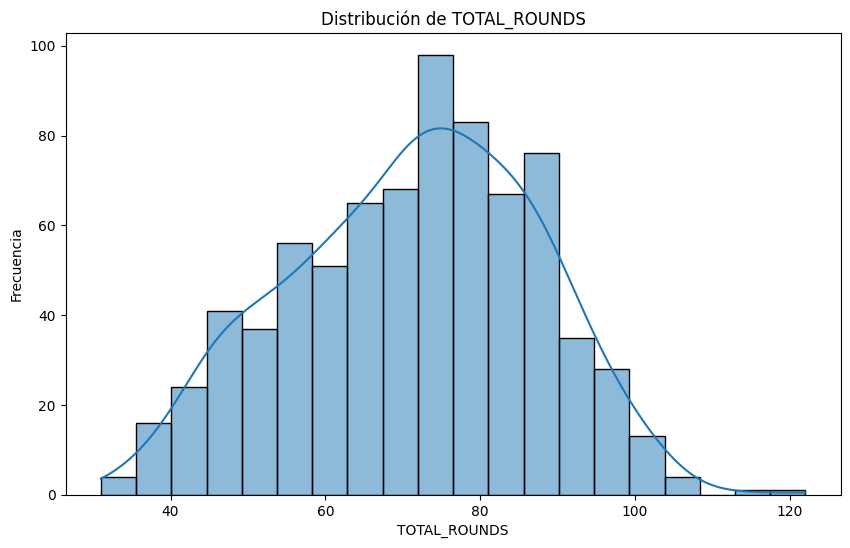

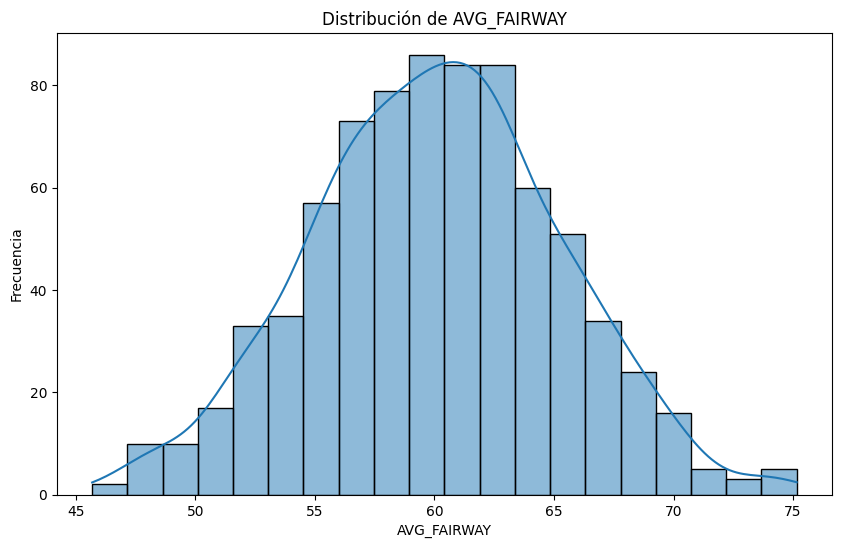

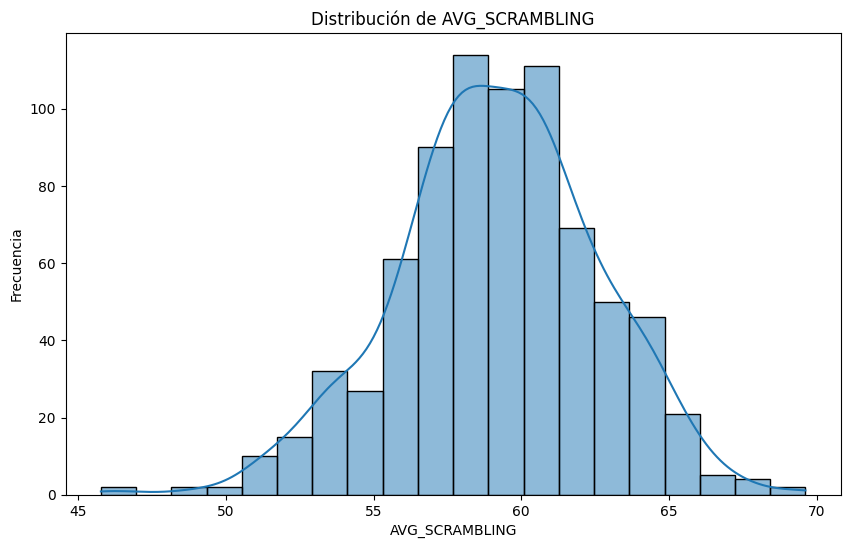

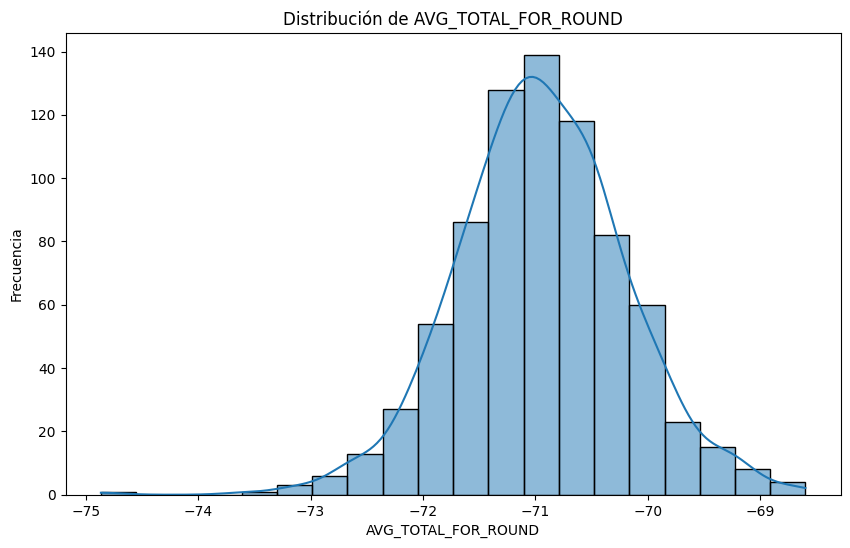

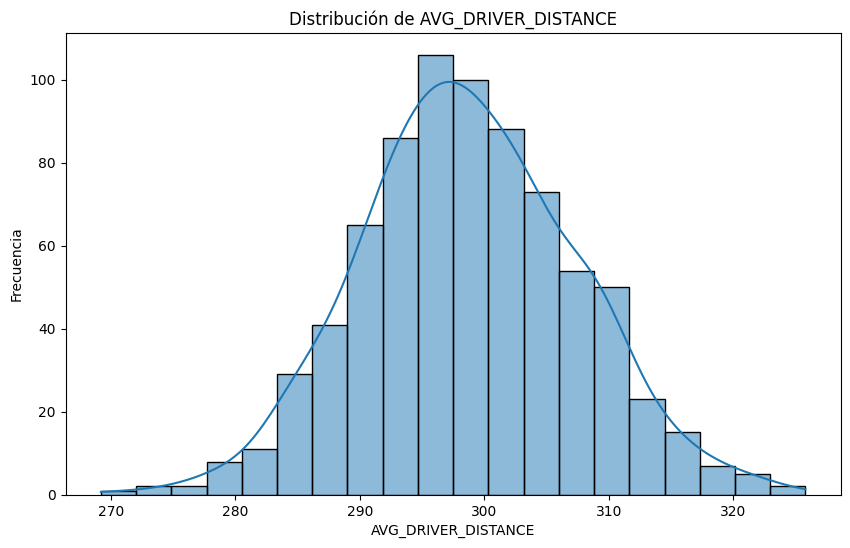

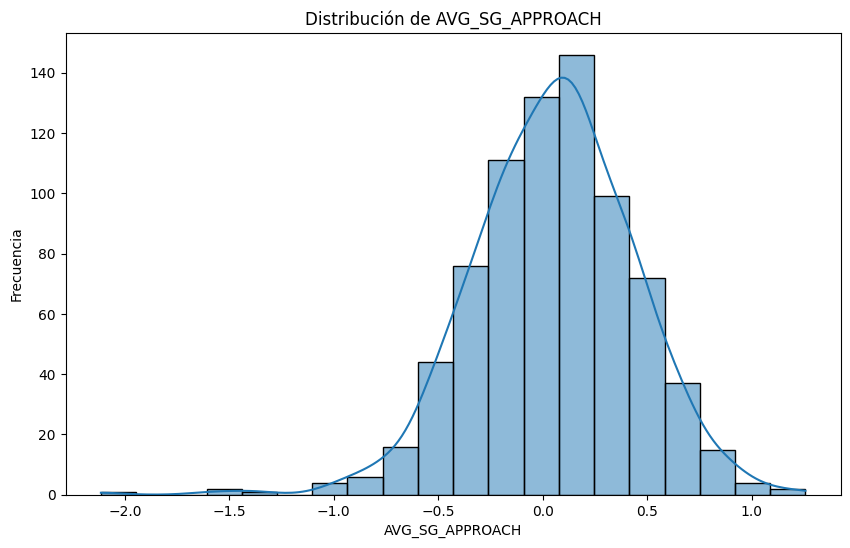

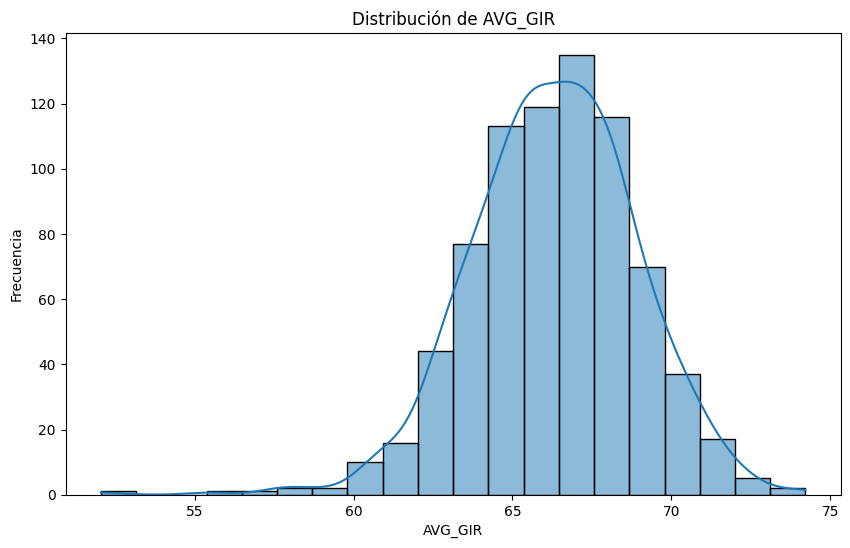

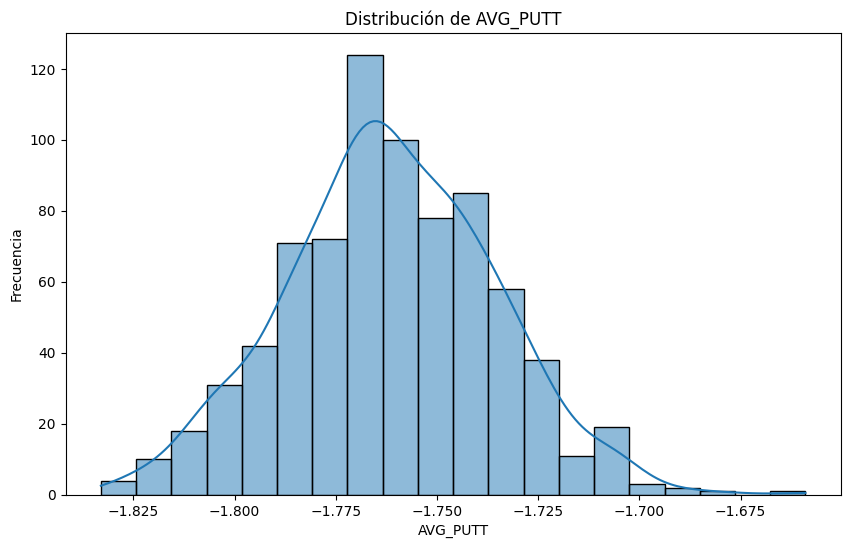

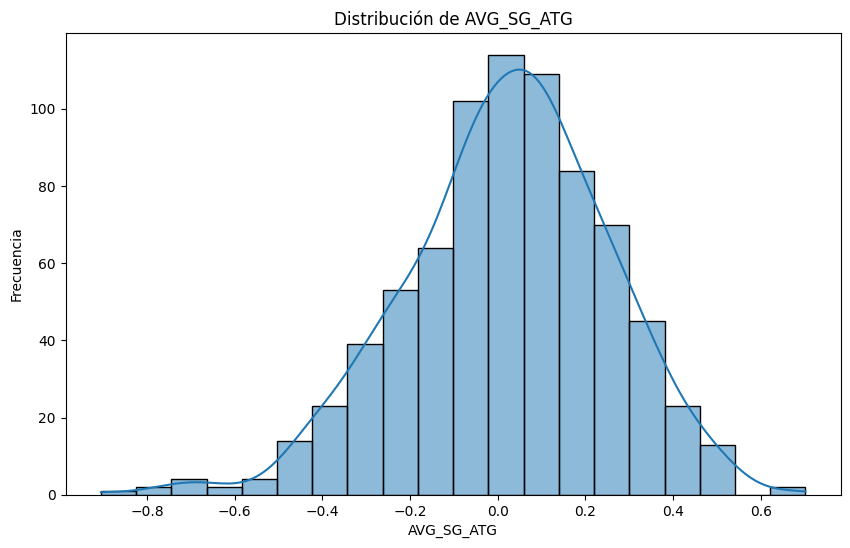

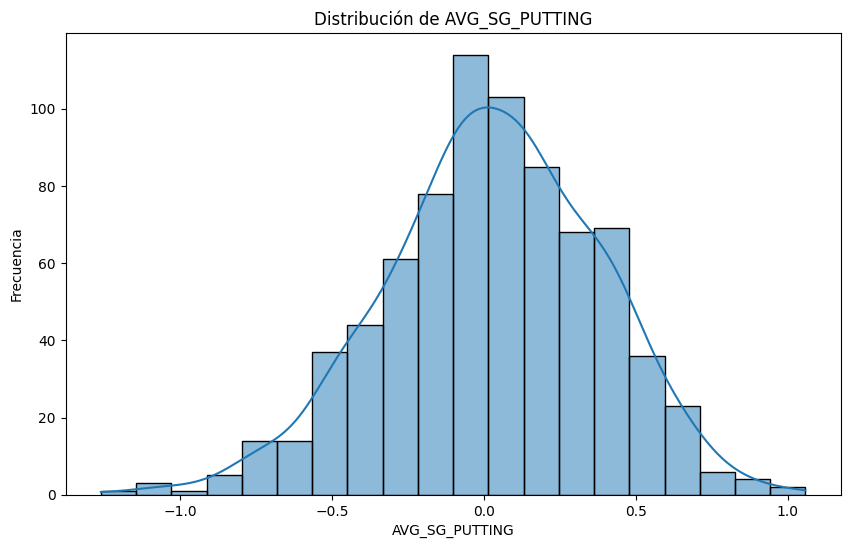

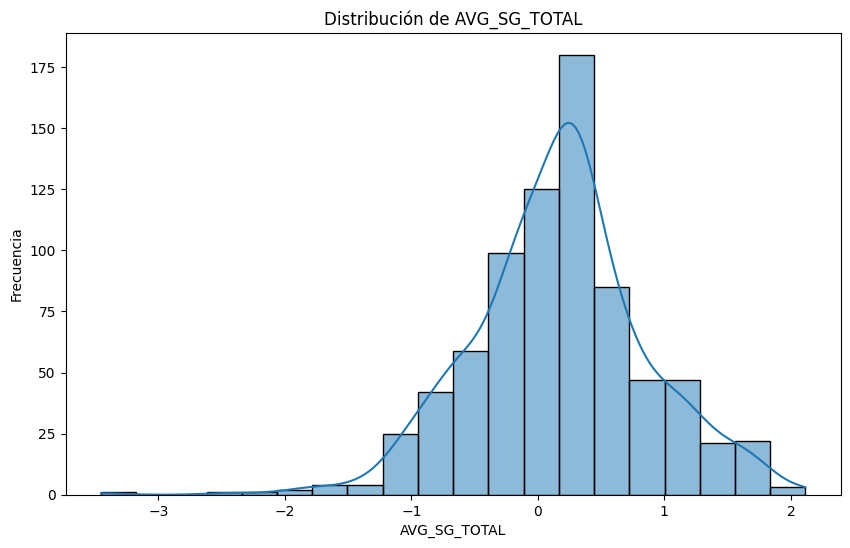

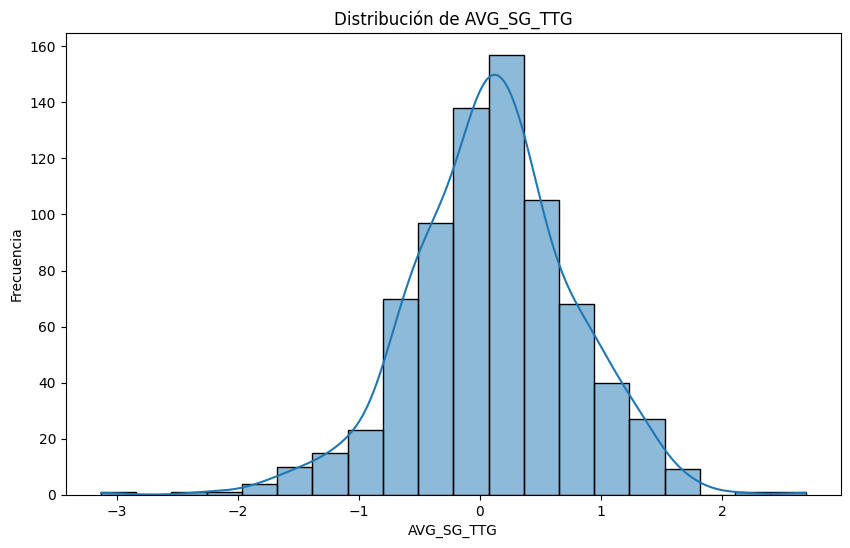

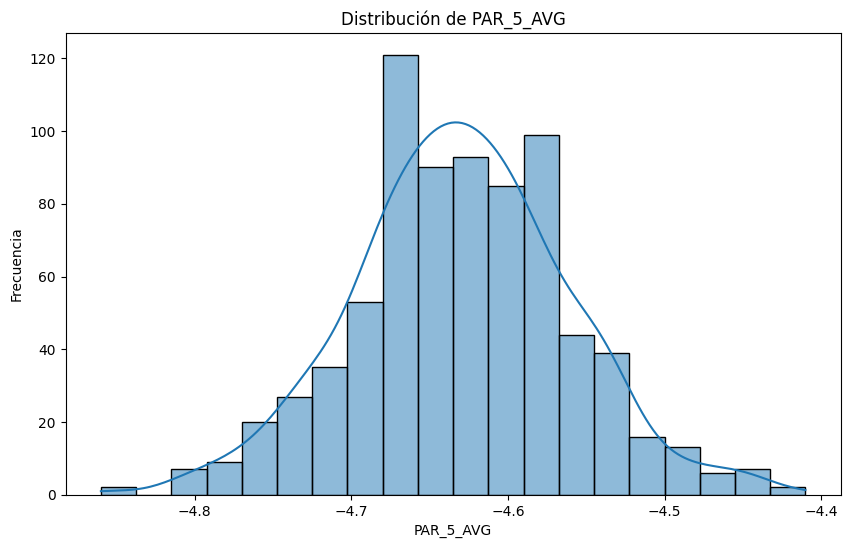

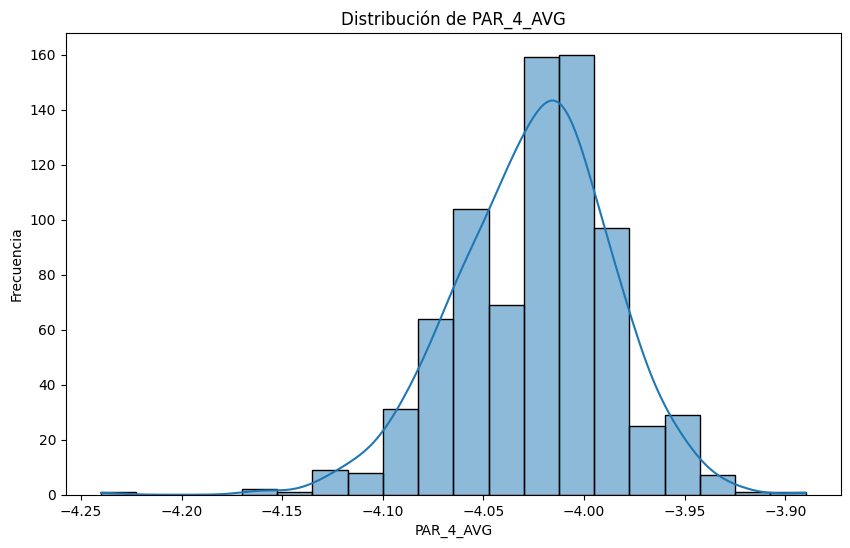

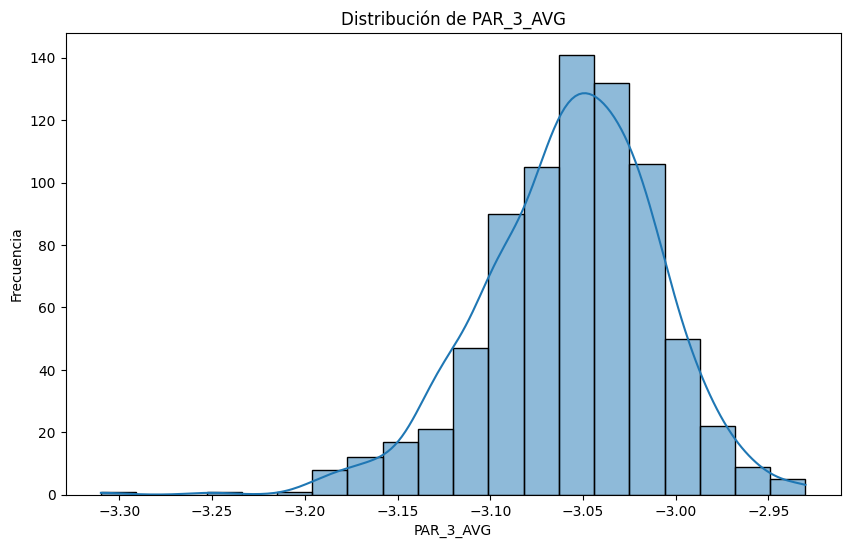

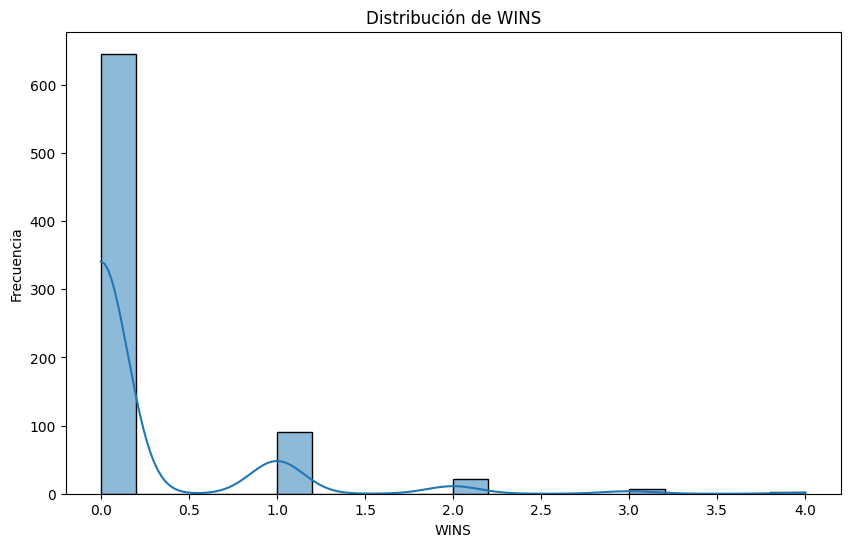

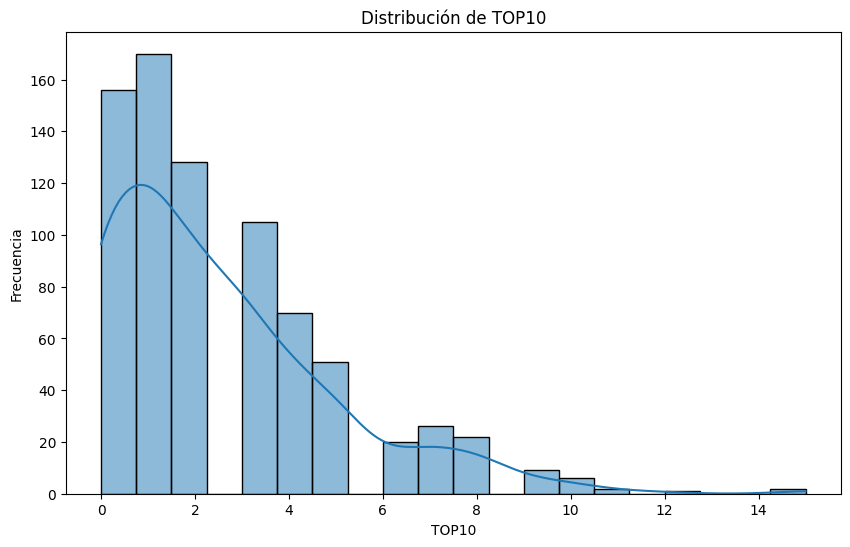

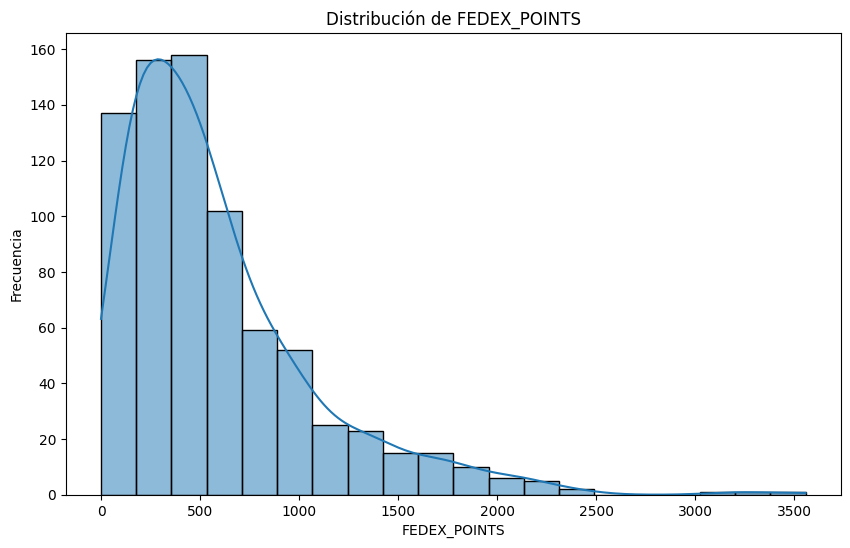

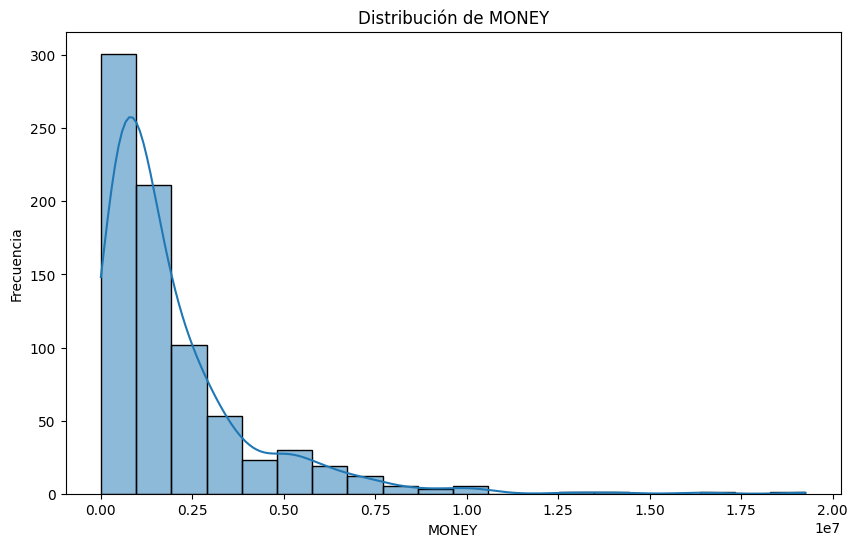

In [66]:
## PRIMEROS ANALISIS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para columnas numéricas (excluyendo PLAYER_ID, PLAYER_NAME y YEAR)
numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
columns_to_analyze = [col for col in numeric_columns if col not in ['PLAYER_ID', 'YEAR']]
data_frame[columns_to_analyze].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Realizar análisis de las distribuciones de cada columna
columns_to_analyze = ['TOTAL_ROUNDS', 'AVG_FAIRWAY', 'AVG_SCRAMBLING', 'AVG_TOTAL_FOR_ROUND', 'AVG_DRIVER_DISTANCE',
                      'AVG_SG_APPROACH', 'AVG_GIR', 'AVG_PUTT', 'AVG_SG_ATG', 'AVG_SG_PUTTING', 'AVG_SG_TOTAL', 'AVG_SG_TTG', 'PAR_5_AVG',
                      'PAR_4_AVG', 'PAR_3_AVG', 'WINS', 'TOP10', 'FEDEX_POINTS', 'MONEY']

for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_frame[column], bins=20, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()



# 1.2 ANALISIS DE CORRELACION

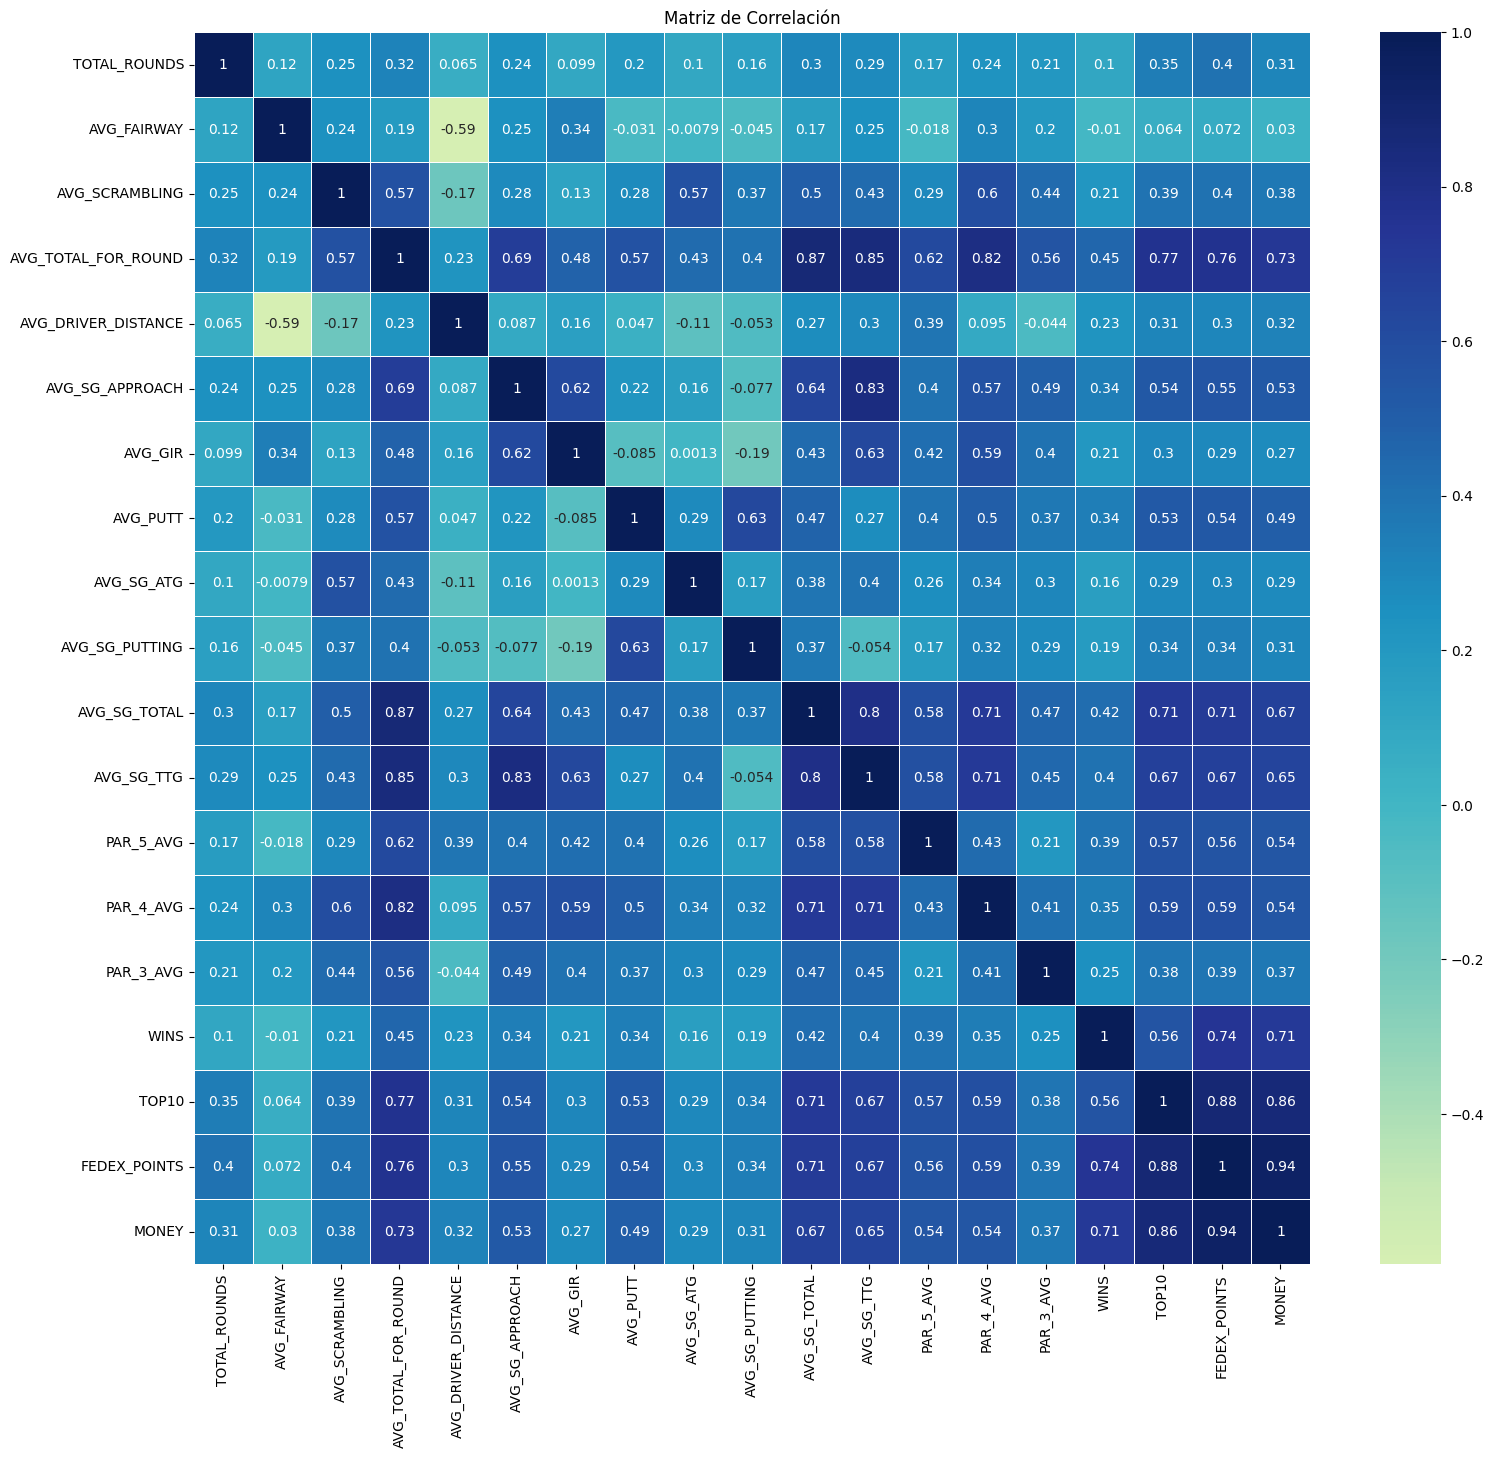

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlación entre columnas numéricas (excluyendo PLAYER_ID y PLAYER_NAME y YEAR)
numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
columns_to_analyze = [col for col in numeric_columns if col not in ['PLAYER_ID', 'PLAYER_NAME','YEAR']]
correlation_matrix = data_frame[columns_to_analyze].corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, center=0)
plt.title('Matriz de Correlación')
plt.show()

# 1.3 ANALISIS DE LAS VICTORIAS

In [69]:
# Numero de jugadores con victoria año a año
win = data_frame.groupby('YEAR')['WINS'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)

# Converting win into ints
win = win.astype(int)

print(win)


WINS    0   1  2  3  4
YEAR                  
2019  169  18  4  2  0
2020  164  24  6  1  1
2021  160  22  4  4  1
2022  153  27  7  0  1


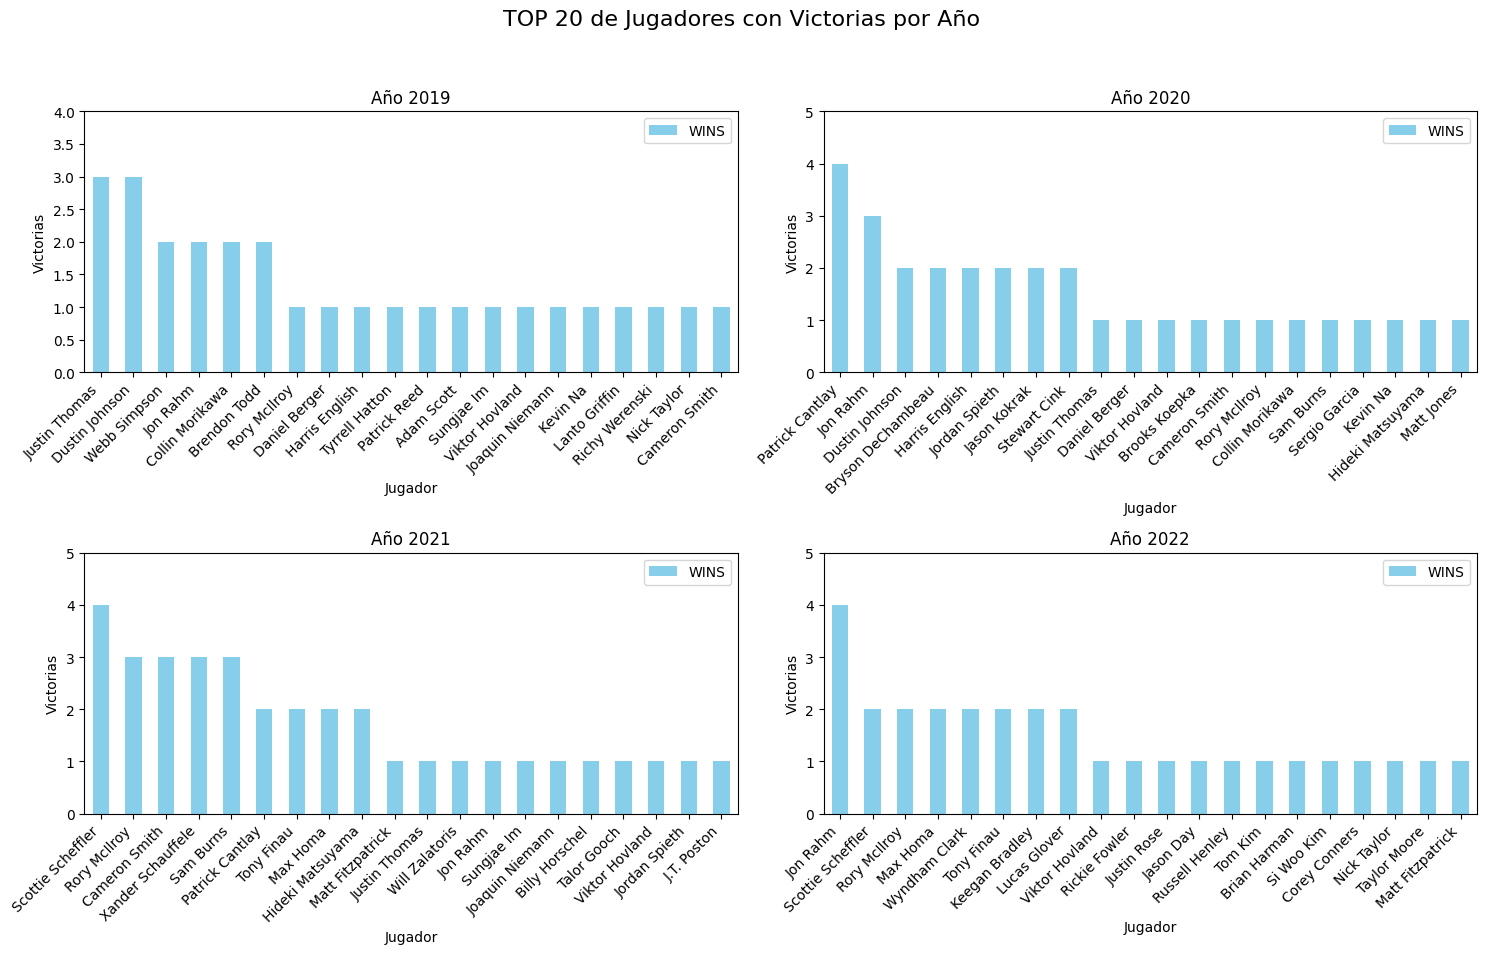

In [70]:
import matplotlib.pyplot as plt

# Obtener el TOP 20 de jugadores con victorias de cada año
top20_by_year = data_frame.groupby('YEAR')['PLAYER_NAME', 'WINS'].apply(lambda x: x.nlargest(20, 'WINS'))

# Crear un gráfico de barras para cada año
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('TOP 20 de Jugadores con Victorias por Año', fontsize=16)

years = top20_by_year.index.get_level_values('YEAR').unique()
row, col = 0, 0

for year in years:
    top20 = top20_by_year.loc[year]
    ax = axes[row, col]
    top20.plot(kind='bar', x='PLAYER_NAME', y='WINS', ax=ax, color='skyblue')
    ax.set_title(f'Año {year}')
    ax.set_xlabel('Jugador')
    ax.set_ylabel('Victorias')
    ax.set_ylim(0, top20['WINS'].max() + 1)
    ax.set_xticklabels(top20['PLAYER_NAME'], rotation=45, ha='right')
    
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


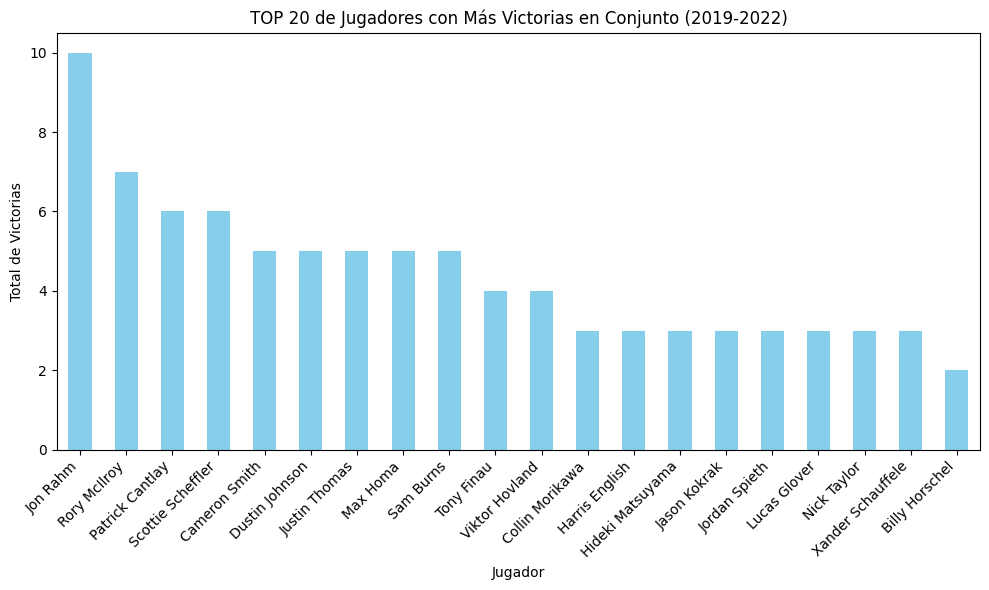

In [71]:
import matplotlib.pyplot as plt

# Obtener el TOP 20 de jugadores con más victorias en conjunto de los 4 años
top20_overall = data_frame.groupby('PLAYER_NAME')['WINS'].sum().nlargest(20)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
top20_overall.plot(kind='bar', color='skyblue')
plt.title('TOP 20 de Jugadores con Más Victorias en Conjunto (2019-2022)')
plt.xlabel('Jugador')
plt.ylabel('Total de Victorias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 1.4 ANALISIS DEL DINERO GANADO

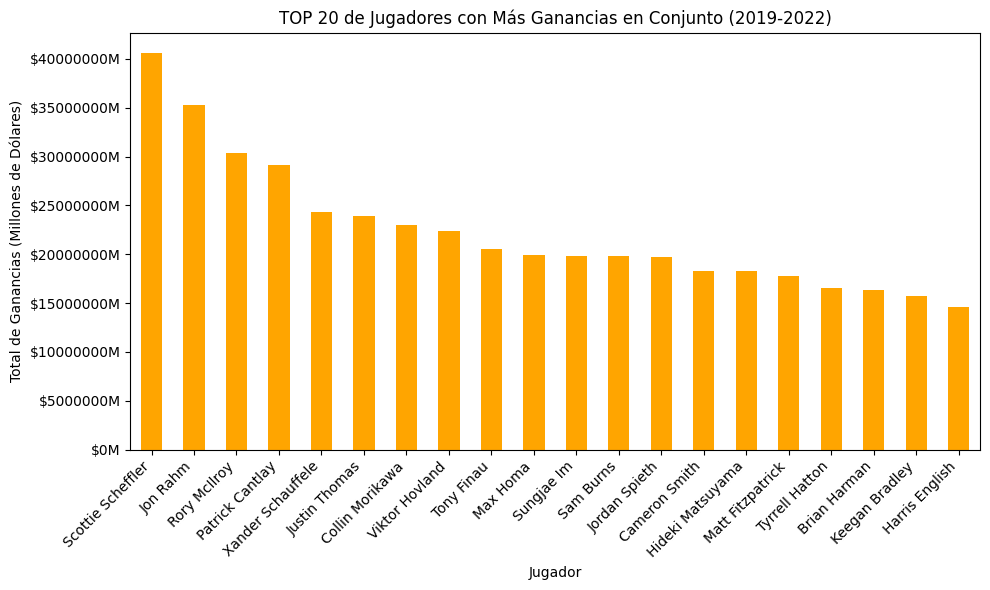

In [72]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Obtener el TOP 20 de jugadores con más ganancias en conjunto de los 4 años
top20_money = data_frame.groupby('PLAYER_NAME')['MONEY'].sum().nlargest(20)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = top20_money.plot(kind='bar', color='orange')
plt.title('TOP 20 de Jugadores con Más Ganancias en Conjunto (2019-2022)')
plt.xlabel('Jugador')
plt.ylabel('Total de Ganancias (Millones de Dólares)')
plt.xticks(rotation=45, ha='right')

# Formatear el eje y para mostrar las ganancias en millones de dólares
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.0f}M'))

plt.tight_layout()
plt.show()




# 1.5 RELACION ENTRE VICTORIAS, DINERO Y TOP 10

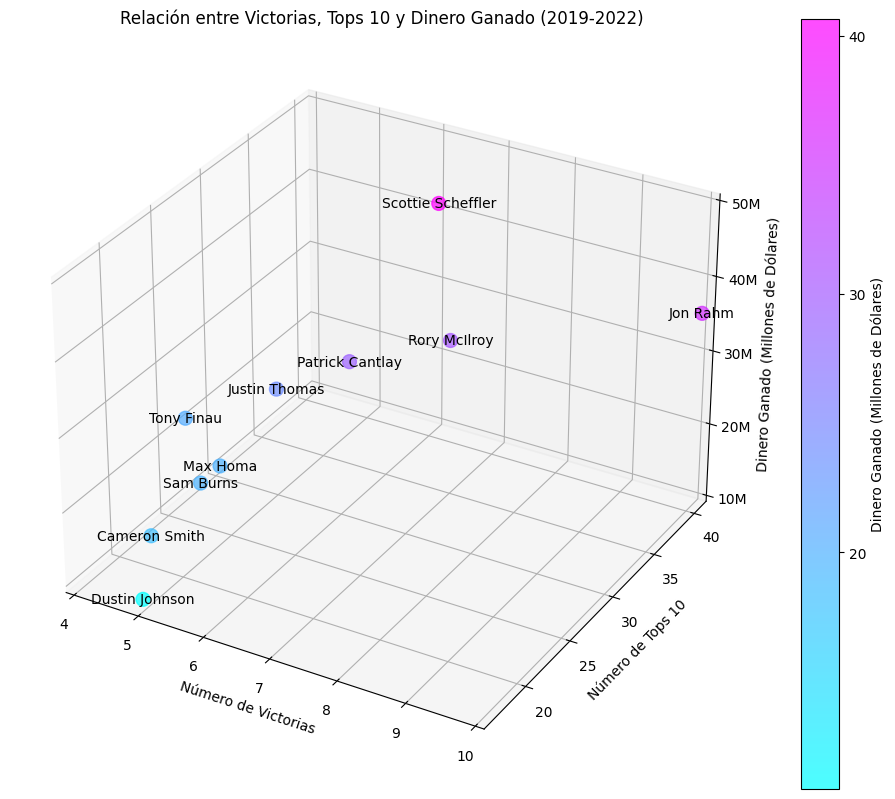

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Obtener el TOP 10 de jugadores con más victorias en conjunto de los 4 años
top10 = data_frame.groupby('PLAYER_NAME')[['WINS', 'TOP10', 'MONEY']].sum().nlargest(10, 'WINS')

# Crear un gráfico de dispersión tridimensional
fig = plt.figure(figsize=(12, 10))  # Aumenta el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')

# Definir los ejes x, y y z
x = top10['WINS']
y = top10['TOP10']
z = top10['MONEY'] / 1000000  # Convertir a millones de dólares

# Ajustar los límites de los ejes para asegurarse de que todos los puntos sean visibles
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))

# Crear el gráfico de dispersión
scatter = ax.scatter(x, y, z, c=z, cmap='cool', s=100, alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Número de Victorias')
ax.set_ylabel('Número de Tops 10')
ax.set_zlabel('Dinero Ganado (Millones de Dólares)')

# Agregar nombres de los jugadores en cada punto
for i, name in enumerate(top10.index):
    ax.text(x[i], y[i], z[i], name, fontsize=10, ha='center', va='center')

# Formatear el eje z para mostrar las ganancias en millones de dólares
z_ticks = [10, 20, 30, 40, 50]
ax.set_zticks(z_ticks)
ax.set_zticklabels([f'{tick}M' for tick in z_ticks])

# Agregar barra de color
cbar = fig.colorbar(scatter, ticks=z_ticks)
cbar.set_label('Dinero Ganado (Millones de Dólares)')

plt.title('Relación entre Victorias, Tops 10 y Dinero Ganado (2019-2022)')

# No uses plt.tight_layout() en gráficos 3D

plt.show()




1.5.1 CORRELACION ENTRE VICTORIA DINERO Y TOP 10

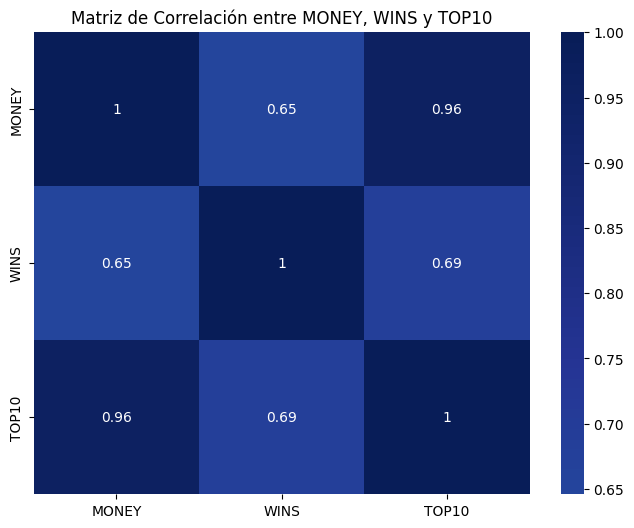

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para el TOP 10 de jugadores con más victorias en conjunto de los 4 años
top10 = data_frame.groupby('PLAYER_NAME')[['WINS', 'TOP10', 'MONEY']].sum().nlargest(10, 'WINS')

# Calcular la matriz de correlación
correlation_matrix = top10[['MONEY', 'WINS', 'TOP10']].corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Matriz de Correlación entre MONEY, WINS y TOP10')
plt.show()



Se ve como esta mas correlacionado con la ganancia economica el hacer los TOP10 que ganando toneos

# 1.6 ANALISIS DE ESTADISTICOS DE JUGADORES CON VICTORIAS RESPECTO JUGADORES SIN VICTORIAS

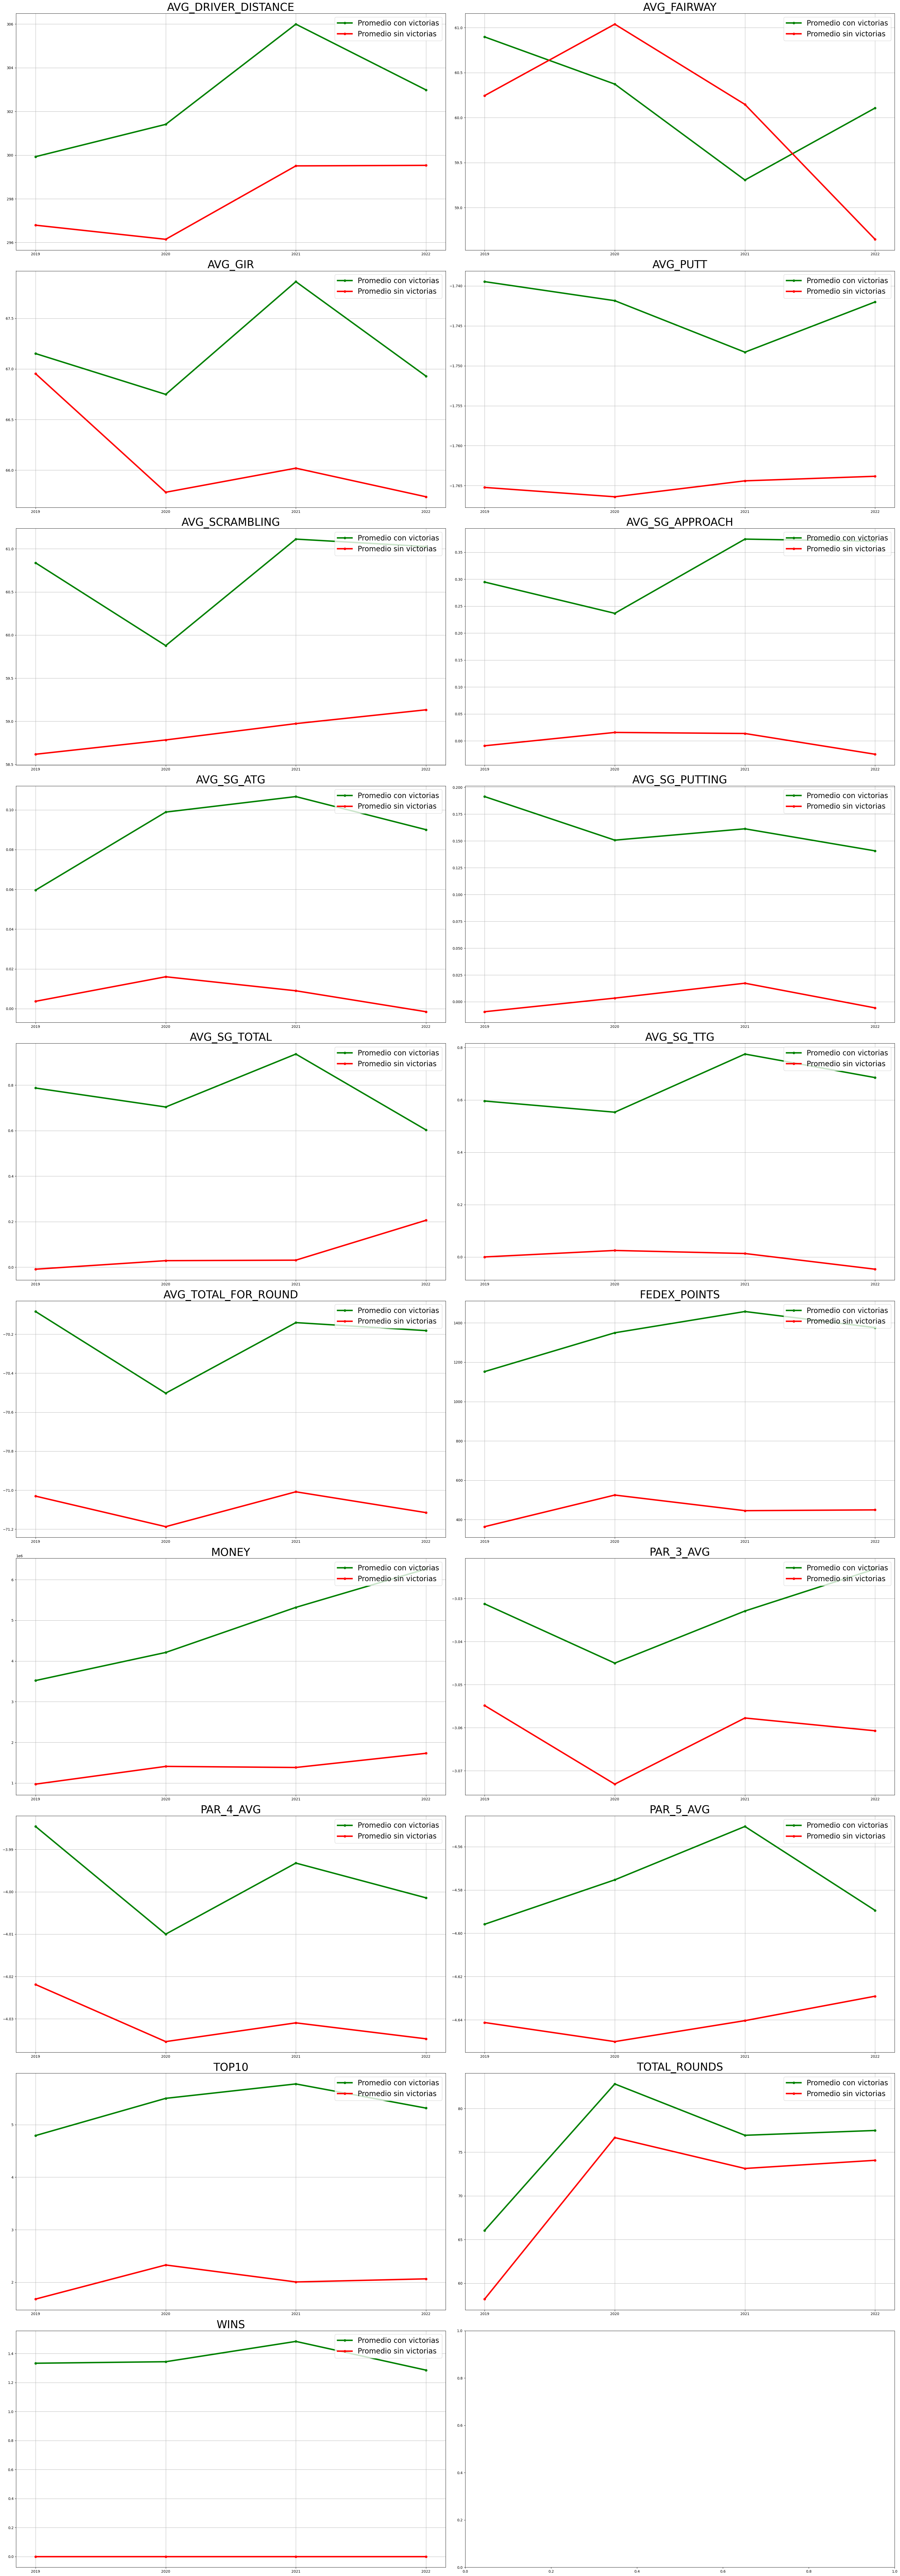

In [76]:
import matplotlib.pyplot as plt

# Establecer el fondo de los gráficos como blanco
plt.rcParams['axes.facecolor'] = 'white'

# Filtrar las columnas relevantes para el análisis
columns_to_plot = data_frame.columns.difference(['PLAYER_ID', 'YEAR', 'PLAYER_NAME'])

# Crear subplots para todas las variables
num_vars = len(columns_to_plot)
num_rows = (num_vars + 1) // 2  # División redondeada hacia arriba
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(35, 10*num_rows))

# Iterar sobre las variables y crear los gráficos
for i, column in enumerate(columns_to_plot):
    avg_with_wins = data_frame[data_frame['WINS'] > 0].groupby('YEAR')[column].mean()
    avg_without_wins = data_frame[data_frame['WINS'] == 0].groupby('YEAR')[column].mean()
    ax_i = ax[i // 2, i % 2]  # Obtener el subplot correspondiente a la fila y columna actual
    
    ax_i.plot(avg_with_wins, 'o-', color='green', linewidth=4, label='Promedio con victorias')  
    ax_i.plot(avg_without_wins, 'o-', color='red', linewidth=4, label='Promedio sin victorias')  
    ax_i.set_title(column, fontsize=30)
    ax_i.set_xticks(data_frame['YEAR'].unique())
    
    # Aumentar el tamaño de la leyenda de colores
    handles, labels = ax_i.get_legend_handles_labels()
    ax_i.legend(handles, labels, loc='upper left', prop={'size': 15})  # Ajustar el tamaño de la leyenda
    
    # Agregar trama de líneas con la escala de los ejes
    ax_i.grid(True)

    # Crear leyenda personalizada
    custom_legend = ax_i.legend(loc='upper right', frameon=True, fontsize=20)  # Ajustar el tamaño de la fuente a la mitad
    custom_legend.get_frame().set_facecolor('white')  # Establecer fondo blanco de la leyenda
    custom_legend.get_frame().set_alpha(0.8)  # Establecer transparencia de la leyenda

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()



# 2 ANALISIS EN DETALLE DE ESTADISTICOS DEL JUEGO

2.1 Rendimiento en tipo de hoyo 

Existen 3 tipos de hoyos en el golf, los pares 3, pares 4 y pares 5. Vamos a analizar que tipo de hoyo es mas importante para obtener victorias

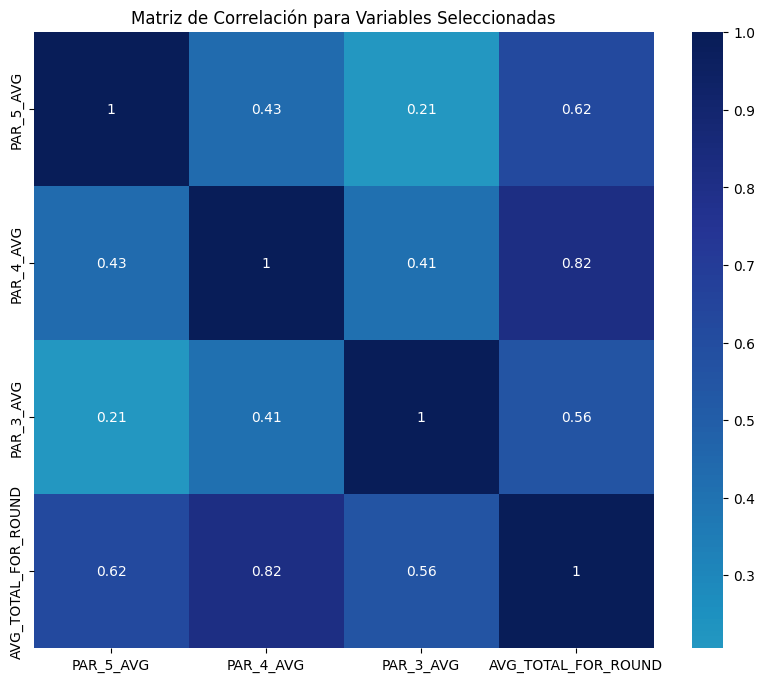

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar las columnas de interés
selected_columns = ['PAR_5_AVG', 'PAR_4_AVG', 'PAR_3_AVG', 'AVG_TOTAL_FOR_ROUND']

# Calcular la matriz de correlación
correlation_matrix = data_frame[selected_columns].corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Matriz de Correlación para Variables Seleccionadas')
plt.show()



2.2 Que factores del juego son mas importantes para obtener victorias

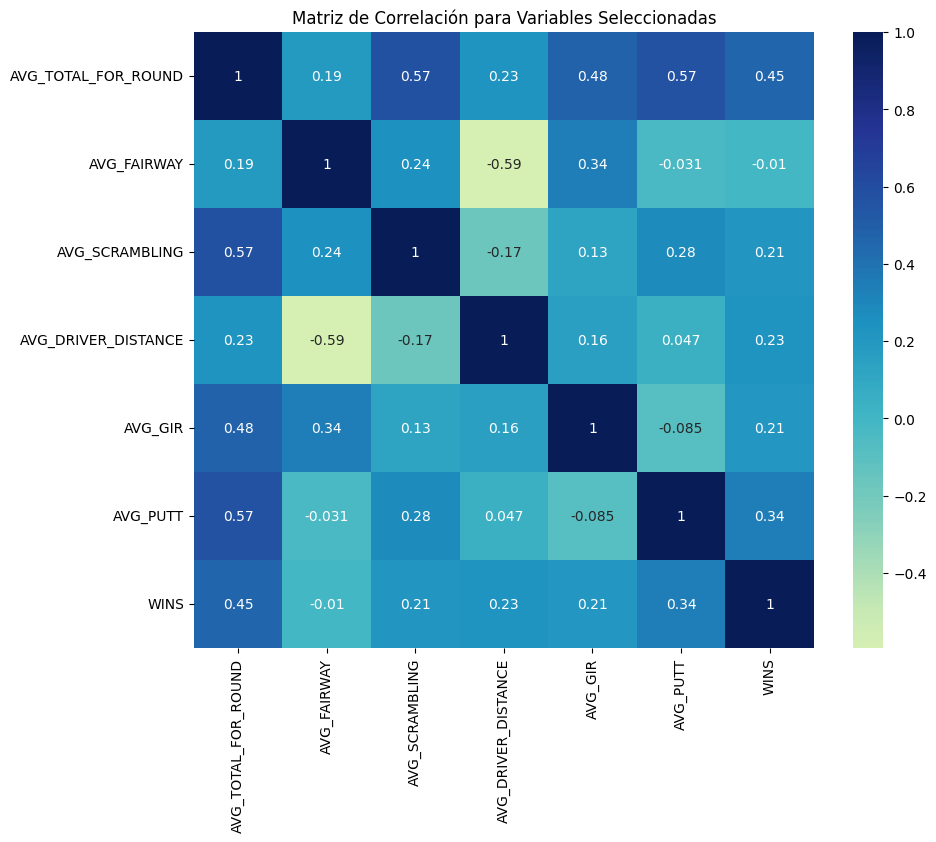

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar las columnas de interés
selected_columns = ['AVG_TOTAL_FOR_ROUND','AVG_FAIRWAY', 'AVG_SCRAMBLING', 'AVG_DRIVER_DISTANCE',
                    'AVG_GIR', 'AVG_PUTT','WINS']

# Calcular la matriz de correlación
correlation_matrix = data_frame[selected_columns].corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Matriz de Correlación para Variables Seleccionadas')
plt.show()

2.3 El Driver y su importancia en el juego 

El DRIVER, el golpe que normalmente se da desde el tee de salida (Dependiendo del tipo dehoyo y la distancia) es una de las facetas mas dificiles del juego por diferentes razones:

1º Es el palo mas largo y con la cabeza mas grande, esto supone que el swing que hay que hacer con este palo es totalmente diferente al resto de palos

2º Es el palo con mas "pegada" eso supone que a mayor distancia, mayor dispersion

3º Los jugadores profesionales pero sobre todo en los amateur creen que la distancia es una de las partes mas importantes del juego, y con este estudio estaditico, queremos comprobarlo

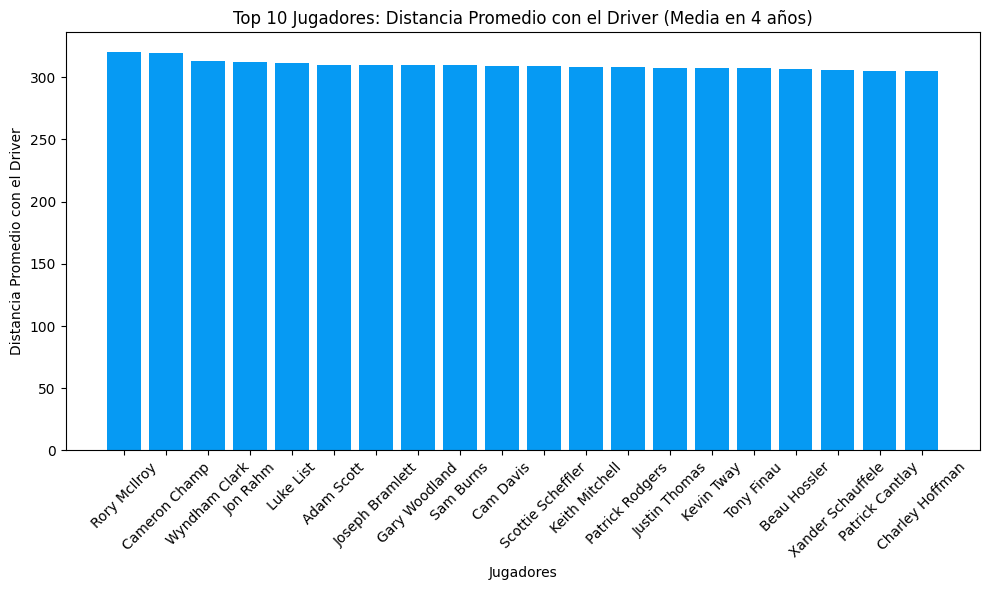

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para los 10 jugadores que le pegan más largo de media en los 4 años
top_drivers_avg = data_frame.groupby('PLAYER_NAME').filter(lambda x: len(x) == 4).groupby('PLAYER_NAME')['AVG_DRIVER_DISTANCE'].mean().nlargest(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_drivers_avg.index, top_drivers_avg.values, color='#069AF3')
plt.xlabel('Jugadores')
plt.ylabel('Distancia Promedio con el Driver')
plt.title('Top 10 Jugadores: Distancia Promedio con el Driver (Media en 4 años)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



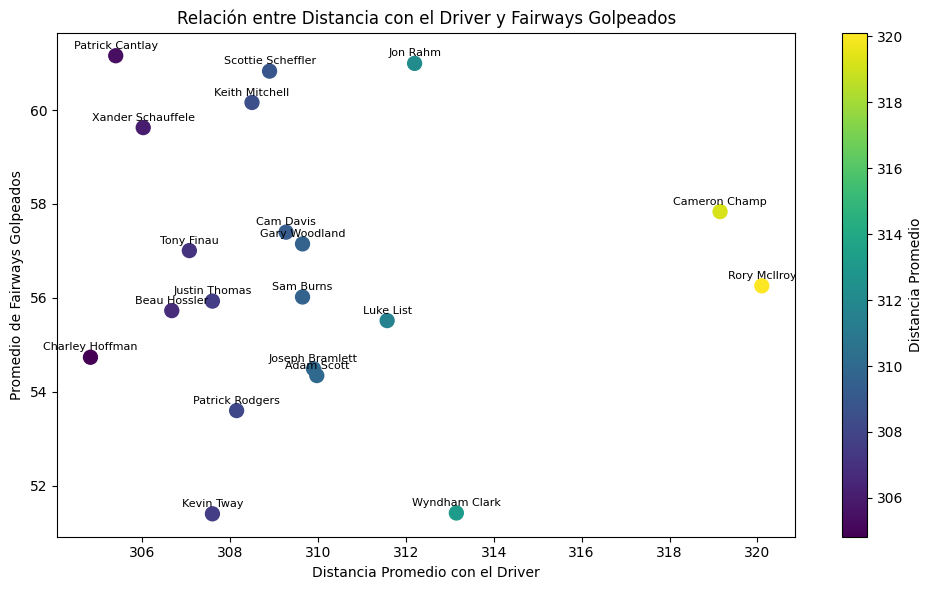

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame data_frame

# Filtrar el DataFrame para los 10 jugadores que le pegan más largo de media en los 4 años
top_drivers_avg = data_frame.groupby('PLAYER_NAME').filter(lambda x: len(x) == 4).groupby('PLAYER_NAME')['AVG_DRIVER_DISTANCE'].mean().nlargest(20)

# Filtrar el DataFrame para los datos de AVG_FAIRWAY de los jugadores seleccionados
fairway_data = data_frame[data_frame['PLAYER_NAME'].isin(top_drivers_avg.index)]

# Calcular las medias de distancia y AVG fairway para los 10 jugadores
avg_distance = fairway_data.groupby('PLAYER_NAME')['AVG_DRIVER_DISTANCE'].mean()
avg_fairway = fairway_data.groupby('PLAYER_NAME')['AVG_FAIRWAY'].mean()

# Crear el gráfico de dispersión con colores según la distancia
plt.figure(figsize=(10, 6))
scatter = plt.scatter(avg_distance, avg_fairway, c=avg_distance, cmap='viridis', s=100)
plt.xlabel('Distancia Promedio con el Driver')
plt.ylabel('Promedio de Fairways Golpeados')
plt.title('Relación entre Distancia con el Driver y Fairways Golpeados')
plt.colorbar(label='Distancia Promedio')
plt.tight_layout()

# Agregar nombres de los jugadores sin superposición
for player, dist, fairway in zip(avg_distance.index, avg_distance, avg_fairway):
    plt.annotate(player, (dist, fairway), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.show()




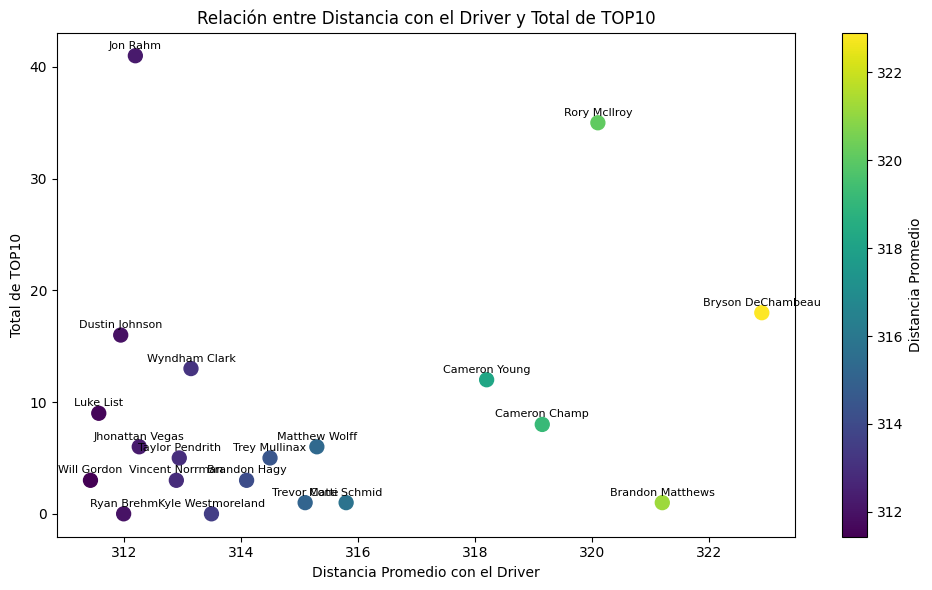

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame data_frame

# Filtrar el DataFrame para los 20 jugadores que le pegan más largo de media en los 4 años
top_drivers_avg = data_frame.groupby('PLAYER_NAME')['AVG_DRIVER_DISTANCE'].mean().nlargest(20)

# Filtrar el DataFrame para los datos de TOP10 de los jugadores seleccionados
top10_data = data_frame[data_frame['PLAYER_NAME'].isin(top_drivers_avg.index)]

# Calcular las medias de distancia y número de top10 para los 20 jugadores
avg_distance = top10_data.groupby('PLAYER_NAME')['AVG_DRIVER_DISTANCE'].mean()
total_top10 = top10_data.groupby('PLAYER_NAME')['TOP10'].sum()

# Crear el gráfico de dispersión con colores según la distancia
plt.figure(figsize=(10, 6))
scatter = plt.scatter(avg_distance, total_top10, c=avg_distance, cmap='viridis', s=100)
plt.xlabel('Distancia Promedio con el Driver')
plt.ylabel('Total de TOP10')
plt.title('Relación entre Distancia con el Driver y Total de TOP10')
plt.colorbar(label='Distancia Promedio')
plt.tight_layout()

# Agregar nombres de los jugadores sin superposición
for player, dist, top10_count in zip(avg_distance.index, avg_distance, total_top10):
    plt.annotate(player, (dist, top10_count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.show()



# FALTA EL ANALISIS DEL APPROACH

# FALTA EL ANALISIS DEL PUTT

# EVOLUCIION DE LAS ESTADISTICAS A LO LARGO DE LOS 4 AÑOS ANALIZADOS

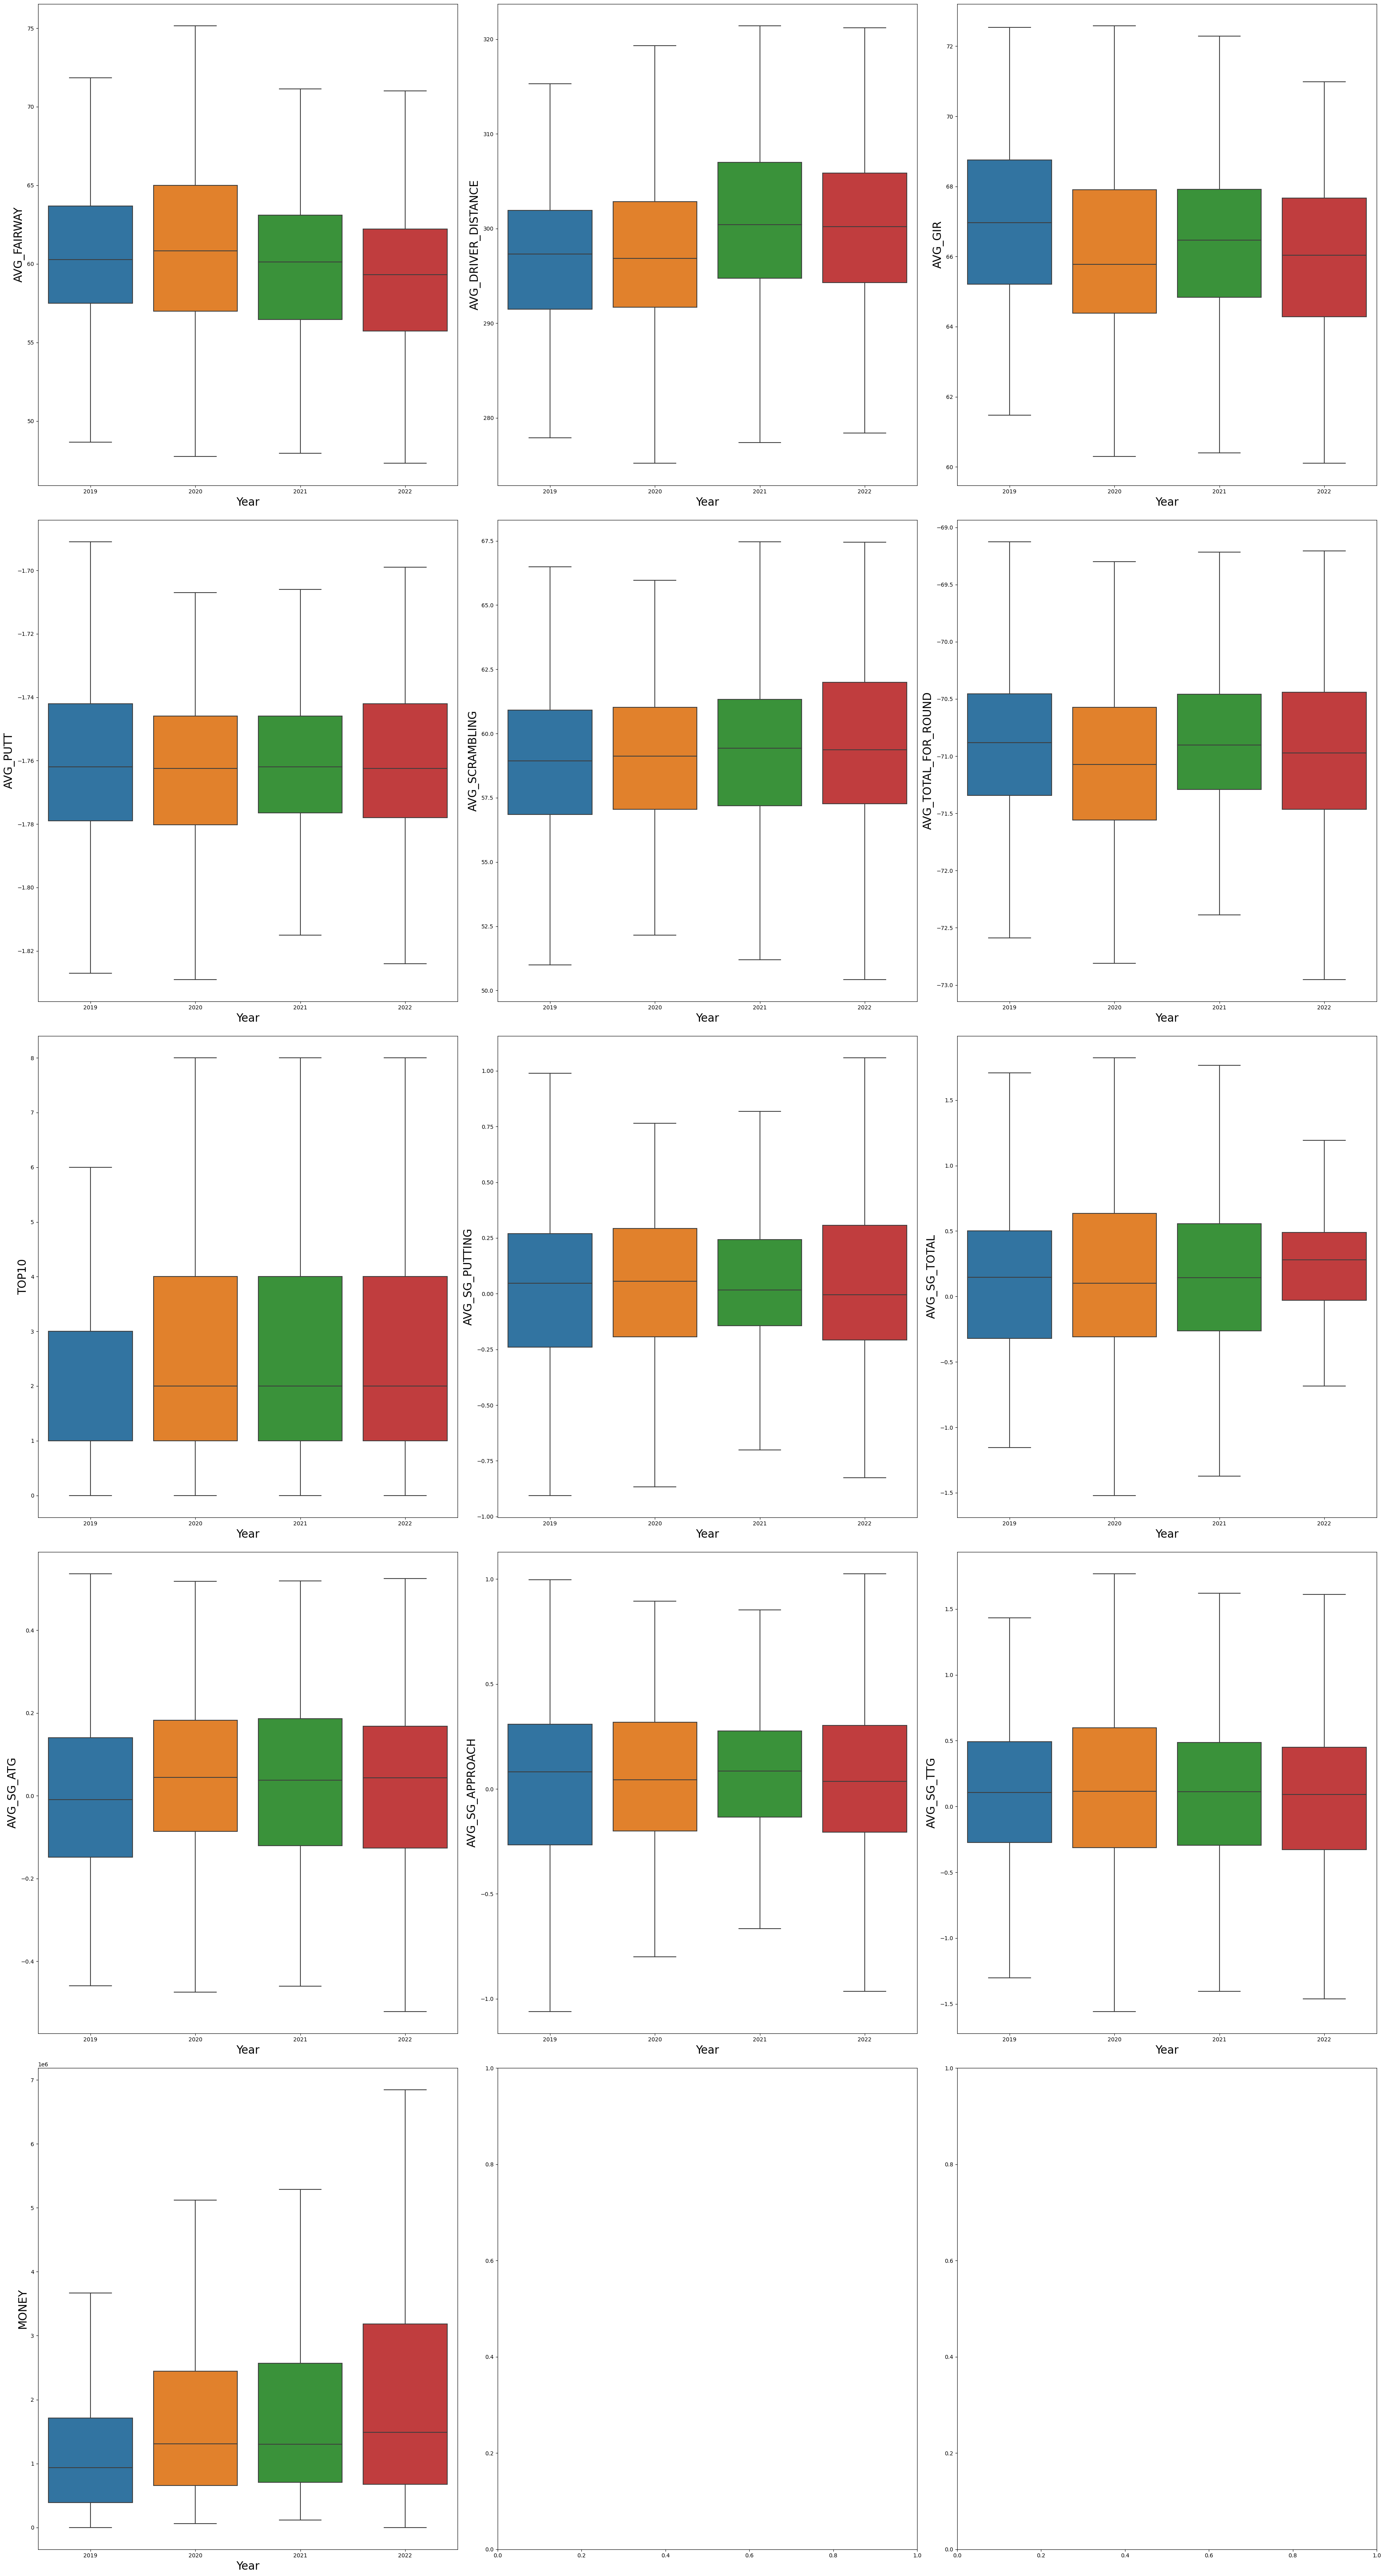

In [84]:

#VAMOS A ANALIZAR LAS ESTADISTICAS A LO LARGO DE LOS AÑOS

import matplotlib.pyplot as plt
import seaborn as sns

# Define las estadísticas a analizar
distribution = ['AVG_FAIRWAY', 'AVG_DRIVER_DISTANCE', 'AVG_GIR', 
                'AVG_PUTT', 'AVG_SCRAMBLING', 'AVG_TOTAL_FOR_ROUND',
                'TOP10', 'AVG_SG_PUTTING', 'AVG_SG_TOTAL', 'AVG_SG_ATG', 'AVG_SG_APPROACH', 
                'AVG_SG_TTG', 'MONEY']

# Crea una matriz de subplots
f, ax = plt.subplots(nrows=5, ncols=3, figsize=(35, 65))

# Itera a través de las estadísticas y crea los gráficos de caja
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x='YEAR', y=column, data=data_frame, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column, fontsize=20)
    p.set_xlabel('Year', fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

plt.tight_layout()
plt.show()



## VAMOS CON LOS MODELOS PREDICTIVOS


In [86]:
data_frame.head()

PLAYER_ID        PLAYER_NAME  TOTAL_ROUNDS  AVG_FAIRWAY  AVG_SCRAMBLING  \
0      29221       Webb Simpson            52        67.42           64.47   
1      46970           Jon Rahm            58        63.16           64.52   
2      33448      Justin Thomas            66        57.53           63.16   
3      28237       Rory McIlroy            60        55.73           60.63   
4      48081  Xander Schauffele            70        59.60           66.49   

   AVG_TOTAL_FOR_ROUND  AVG_DRIVER_DISTANCE  AVG_SG_APPROACH  AVG_GIR  \
0              -68.978                296.2            0.640    70.83   
1              -69.127                307.6            0.283    70.31   
2              -69.128                304.2            0.997    69.61   
3              -69.219                314.0            0.504    67.78   
4              -69.227                305.4            0.366    70.87   

   AVG_PUTT  ...  AVG_SG_TOTAL  AVG_SG_TTG  PAR_5_AVG  PAR_4_AVG  PAR_3_AVG  \
0    -1.691  ...         1.597       1.007      -4.52      -3.89      -2.97   
1    -1.717  ...         1.823       1.344      -4.46      -3.95      -2.99   
2    -1.722  ...         1.709       1.741      -4.48      -3.93      -3.04   
3    -1.738  ...         1.243       1.314      -4.54      -3.96      -3.01   
4    -1.737  ...         1.605       1.239      -4.45      -3.94      -3.09   

   WINS  TOP10  YEAR  FEDEX_POINTS    MONEY  
0     2      8  2019          1878  5097742  
1     2      8  2019          1295  5959819  
2     3     10  2019          2458  7344040  
3     1      7  2019          1327  4408415  
4     0      7  2019          1258  3813636  

[5 rows x 22 columns]

In [87]:
#REGRESION LINEAL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data_frame1 = data_frame

# Divide los datos en conjunto de entrenamiento y prueba
X = data_frame1.drop(['PLAYER_ID', 'PLAYER_NAME', 'YEAR', 'WINS'], axis=1)  # Características
y = data_frame1['WINS']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.20968634225930144
R-squared: 0.5394163848271192


In [88]:
# OTRO TIPO DE REGRESION - RIDGE

# La Regresión Ridge es una técnica que combina la regresión lineal con una penalización en los coeficientes para evitar el sobreajuste. 


# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el DataFrame
# data_frame = ... (tu DataFrame aquí)

# Separar las características (X) y el objetivo (y)
X = data_frame.drop(columns=['PLAYER_NAME', 'WINS'])  # Excluir la columna de nombres de jugadores
y = data_frame['WINS']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión Ridge
ridge_model = Ridge(alpha=10) 
ridge_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = ridge_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.188773391374619
R-squared: 0.5853524358765894


In [89]:
from sklearn.linear_model import RidgeCV

# Vamos a ver cual es el ajuste optimo de alpha para el modelo de RIDGE

# Crear y entrenar el modelo de regresión Ridge con validación cruzada
ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)
ridge_cv.fit(X_train, y_train)

# Obtener el valor óptimo de alpha
optimal_alpha_ridge = ridge_cv.alpha_
print("Optimal alpha for Ridge:", optimal_alpha_ridge)

# Crear y entrenar el modelo de regresión Ridge con el valor óptimo de alpha
ridge_model = Ridge(alpha=optimal_alpha_ridge)
ridge_model.fit(X_train, y_train)


c:\Users\kikot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17799e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kikot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.18266e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kikot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.15345e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kikot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.48727e-17): result may not be accurate.
  return linalg.solve

Optimal alpha for Ridge: 10.0


Ridge(alpha=10.0)

In [90]:
# REGRESION DE LASSO

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

data_frame3 = data_frame

# Separar las características (X) y la variable objetivo (y)
X = data_frame.drop(['PLAYER_NAME', 'WINS'], axis=1)
y = data_frame['WINS']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión Lasso
lasso_model = Lasso(alpha=0.001)  
lasso_model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.2118260355926026
R-squared: 0.5347164712314381


In [91]:
# VAMOS A VER CUAL ES EL VALOR OPTIMO DE ALPHA PPARA LASSO

from sklearn.linear_model import LassoCV

# Crear y entrenar el modelo de regresión Lasso con validación cruzada
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)
lasso_cv.fit(X_train, y_train)

# Obtener el valor óptimo de alpha
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha:", optimal_alpha)

# Crear y entrenar el modelo de regresión Lasso con el valor óptimo de alpha
lasso_model = Lasso(alpha=optimal_alpha)
lasso_model.fit(X_train, y_train)

Optimal alpha: 0.001


Lasso(alpha=0.001)

INTERPRETACION DE RESULTADOS:

Segun los resultados obtenidos, parece que el modelo RIDGE tiene el mejor renimiento seguido por Lasso y a posteriori RL 

In [93]:
# VALIDACION CRUZADA DE A PRIORI EL MEJOR MODELO, EL DE RIDGE

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Crear el modelo Ridge
alpha_value = 1.0  # Puedes ajustar el valor de alpha aquí
ridge_model = Ridge(alpha=alpha_value)

# Realizar validación cruzada
mse_scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_squared_error', cv=5)
r2_scores = cross_val_score(ridge_model, X, y, scoring='r2', cv=5)

# Convertir las puntuaciones de MSE a positivas
mse_scores = -mse_scores

# Calcular promedios de las puntuaciones
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

print("Mean Squared Error (MSE) scores:", mse_scores)
print("Mean MSE:", mean_mse)
print("R-squared scores:", r2_scores)
print("Mean R-squared:", mean_r2)


Mean Squared Error (MSE) scores: [0.12716934 0.20461999 0.1146408  0.16195218 0.08240404]
Mean MSE: 0.1381572716667287
R-squared scores: [0.56246218 0.46247589 0.76724414 0.51408117 0.26317945]
Mean R-squared: 0.5138885670592774


INTERPRETACION VALIDACION CRUZADA

Mean Squared Error (MSE) es una medida de cuánto se desvían las predicciones del modelo de los valores reales. 

Cuanto más cercano a cero sea el MSE, mejor. Los valores individuales de MSE en tus resultados varían, pero el "Mean MSE" (MSE promedio) es aproximadamente 0.138. 

Esto indica que, en promedio, las predicciones del modelo están desviándose por esa cantidad al cuadrado de los valores reales. 

Un valor de MSE tan bajo es positivo, lo que significa que el modelo está logrando una buena precisión en sus predicciones.

R-squared (coeficiente de determinación) es una medida que indica cuánto de la variabilidad en los datos de salida se explica por el modelo.

Puede variar entre 0 y 1, donde 1 indica una perfecta concordancia entre las predicciones del modelo y los valores reales. 
En los resultados, los valores individuales de R-squared varían entre 0.263 y 0.767. 

El "Mean R-squared" (R-squared promedio) es aproximadamente 0.514, lo que sugiere que, en promedio, el modelo está explicando alrededor del 51.4% de la variabilidad en los datos de salida.

Ese dato no es bueno por lo que los modelos de regresion de lasso, de ridge y la regresion lineal no nos dan buenos resultados explicativos de las variables

## Vamos a verlo desde otro modo

Como solo hay determinados jugadores (Un porcentaje pequeño) que han ganado, vamos a crear una nueva columna numerica con un valor 1 a quien haya ganado en algun momento y un 0 a quien no, y esa va a ser nuestra nueva variable objetivo llamada WINNER

Vamos a aplicar en primer lugar un modelo de Regresion Logistica

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Agregar la columna Winner para determinar los jugadores que ganaron y los que no
data_frame['WINNER'] = data_frame['WINS'].apply(lambda x: 1 if x > 0 else 0)

# Valores de la columna Winner para el modelo (target)
target = data_frame['WINNER']

# Crear DataFrame sin las columnas PLAYER_NAME, WINS, Winner
data_frame_winner = data_frame.drop(['PLAYER_NAME','WINS', 'WINNER','PLAYER_ID', 'TOTAL_ROUNDS', 'AVG_TOTAL_FOR_ROUND' ], axis=1)

# Función para la regresión logística
def log_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    clf = LogisticRegression(solver='liblinear', max_iter=1000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
          .format(clf.score(X_test, y_test)))
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data=cf_mat)
    print(confusion)
    
    print(classification_report(y_test, y_pred))
    
    # Obtener las 10 características más importantes
    rfe = RFE(estimator=clf, n_features_to_select=10)
    rfe = rfe.fit(X_train, y_train)  # Ajustar al conjunto de entrenamiento
    print('Top 10 Feature Importance')
    print(X.columns[rfe.support_])  # Seleccionar las características elegidas
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

# Llamar a la función log_reg con las características y el target del DataFrame
log_reg(data_frame_winner, target)




Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.92
     0   1
0  155   4
1   11  22
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.85      0.67      0.75        33

    accuracy                           0.92       192
   macro avg       0.89      0.82      0.85       192
weighted avg       0.92      0.92      0.92       192

Top 10 Feature Importance
Index(['AVG_SCRAMBLING', 'AVG_SG_APPROACH', 'AVG_GIR', 'AVG_SG_ATG',
       'AVG_SG_PUTTING', 'AVG_SG_TOTAL', 'AVG_SG_TTG', 'PAR_5_AVG',
       'PAR_3_AVG', 'TOP10'],
      dtype='object')
ROC AUC Score: 0.82


Vemos como los accuracy del entrenamiento y test son bastante buenos, cercanos a 1, el ROC tambien es muy bueno pero vamos a intentar mejorarlo, vamos a incorporar nuevas columnas para intentar mejorar el calculo

In [98]:
data_frame.head()

PLAYER_ID        PLAYER_NAME  TOTAL_ROUNDS  AVG_FAIRWAY  AVG_SCRAMBLING  \
0      29221       Webb Simpson            52        67.42           64.47   
1      46970           Jon Rahm            58        63.16           64.52   
2      33448      Justin Thomas            66        57.53           63.16   
3      28237       Rory McIlroy            60        55.73           60.63   
4      48081  Xander Schauffele            70        59.60           66.49   

   AVG_TOTAL_FOR_ROUND  AVG_DRIVER_DISTANCE  AVG_SG_APPROACH  AVG_GIR  \
0              -68.978                296.2            0.640    70.83   
1              -69.127                307.6            0.283    70.31   
2              -69.128                304.2            0.997    69.61   
3              -69.219                314.0            0.504    67.78   
4              -69.227                305.4            0.366    70.87   

   AVG_PUTT  ...  AVG_SG_TTG  PAR_5_AVG  PAR_4_AVG  PAR_3_AVG  WINS  TOP10  \
0    -1.691  ...       1.007      -4.52      -3.89      -2.97     2      8   
1    -1.717  ...       1.344      -4.46      -3.95      -2.99     2      8   
2    -1.722  ...       1.741      -4.48      -3.93      -3.04     3     10   
3    -1.738  ...       1.314      -4.54      -3.96      -3.01     1      7   
4    -1.737  ...       1.239      -4.45      -3.94      -3.09     0      7   

   YEAR  FEDEX_POINTS    MONEY  WINNER  
0  2019          1878  5097742       1  
1  2019          1295  5959819       1  
2  2019          2458  7344040       1  
3  2019          1327  4408415       1  
4  2019          1258  3813636       0  

[5 rows x 23 columns]

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


# Agregar la columna Winner para determinar los jugadores que ganaron y los que no
data_frame['WINNER'] = data_frame['WINS'].apply(lambda x: 1 if x > 0 else 0)

# Creamos nuevas columnas

data_frame['DISTANCEANDFAIRWAY'] = data_frame['AVG_DRIVER_DISTANCE'] / data_frame['AVG_FAIRWAY']
data_frame['MONEYFORPOINT'] = data_frame['FEDEX_POINTS'] / data_frame['MONEY']

data_frame['TOP10'] = data_frame['TOP10'].replace(0, 1e-10) # Aqui eliminamos el 0 y los sustituimos por un numero muy pequeño para que no nos de problemas el dividir 0 entre algo
data_frame['MONEYFORTOP10'] = data_frame['MONEY'] / data_frame['TOP10']

# Limpieza de NaN por la media de las columnas
data_frame.fillna(data_frame.mean(), inplace=True)

# Valores de la columna Winner para el modelo (target)
target = data_frame['WINNER']

# Crear DataFrame sin las columnas PLAYER_NAME, WINS, Winner
data_frame_winner = data_frame.drop(['PLAYER_NAME','WINS', 'WINNER','PLAYER_ID', 'TOTAL_ROUNDS', 'AVG_TOTAL_FOR_ROUND' ], axis=1)

# Estandarizar las características
scaler = StandardScaler()
data_frame_scaled = scaler.fit_transform(data_frame_winner)

# Función para la regresión logística
def log_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    clf = LogisticRegression(solver='liblinear', max_iter=1000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
          .format(clf.score(X_test, y_test)))
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data=cf_mat)
    print(confusion)
    
    print(classification_report(y_test, y_pred))
    
    # Obtener las 10 características más importantes
    rfe = RFE(estimator=clf, n_features_to_select=10)
    rfe = rfe.fit(X_train, y_train)  # Ajustar al conjunto de entrenamiento
    print('Top 10 Feature Importance')
    print(data_frame_winner.columns[rfe.support_])  # Seleccionar las características elegidas
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

# Llamar a la función log_reg con las características y el target del DataFrame escalado
log_reg(data_frame_scaled, target)


Accuracy of Logistic regression classifier on training set: 0.91
Accuracy of Logistic regression classifier on test set: 0.90
     0   1
0  154   5
1   14  19
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       159
           1       0.79      0.58      0.67        33

    accuracy                           0.90       192
   macro avg       0.85      0.77      0.80       192
weighted avg       0.90      0.90      0.89       192

Top 10 Feature Importance
Index(['AVG_SG_APPROACH', 'AVG_GIR', 'AVG_SG_PUTTING', 'AVG_SG_TOTAL',
       'AVG_SG_TTG', 'PAR_4_AVG', 'TOP10', 'FEDEX_POINTS', 'MONEY',
       'MONEYFORTOP10'],
      dtype='object')
ROC AUC Score: 0.77


## Empeora el modelo, algo curioso

Vamos a aplicar otro tipo de modelos para ver si podemos mejorar los resultados, vamos con el RANDOM FOREST

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Crear DataFrame sin las columnas PLAYER_NAME, WINS, TOP10, MONEY, FEDEX_POINTS
data_frame_winner = data_frame.drop(['PLAYER_NAME', 'WINS', 'TOP10', 'MONEY', 'FEDEX_POINTS','TOTAL_ROUNDS','AVG_TOTAL_FOR_ROUND'], axis=1)

# Definir tus características (X) y la columna objetivo (y)
X = data_frame_winner.drop('WINNER', axis=1)
y = data_frame_winner['WINNER']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest con regularización (limitando max_depth)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir en los conjuntos de entrenamiento y prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calcular las métricas de accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

# Imprimir las métricas de accuracy
print("Accuracy of Random Forest classifier on training set: {:.2f}".format(train_accuracy))
print("Accuracy of Random Forest classifier on test set: {:.2f}".format(test_accuracy))

# Calcular y mostrar el classification report
print("Classification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Calcular el valor de ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print("ROC AUC Score:", roc_auc)

# Obtener las características más importantes
feature_importances = rf_model.feature_importances_

# Obtener los índices de las características más importantes (top 10)
top_10_indices = feature_importances.argsort()[-10:][::-1]

# Obtener los nombres de las características correspondientes
top_10_features = X.columns[top_10_indices]

# Imprimir las características más importantes
print("Top 10 Feature Importance:")
print(top_10_features)



Accuracy of Random Forest classifier on training set: 0.92
Accuracy of Random Forest classifier on test set: 0.92
Classification Report on test set:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       132
           1       0.85      0.50      0.63        22

    accuracy                           0.92       154
   macro avg       0.88      0.74      0.79       154
weighted avg       0.91      0.92      0.91       154

ROC AUC Score: 0.8591597796143251
Top 10 Feature Importance:
Index(['AVG_SG_TOTAL', 'AVG_SG_TTG', 'PAR_5_AVG', 'AVG_SG_APPROACH',
       'MONEYFORTOP10', 'MONEYFORPOINT', 'AVG_PUTT', 'AVG_SG_PUTTING',
       'PAR_4_AVG', 'PAR_3_AVG'],
      dtype='object')


Estos datos son realmente buenos, vamos a analizar si hay sobre ajuste

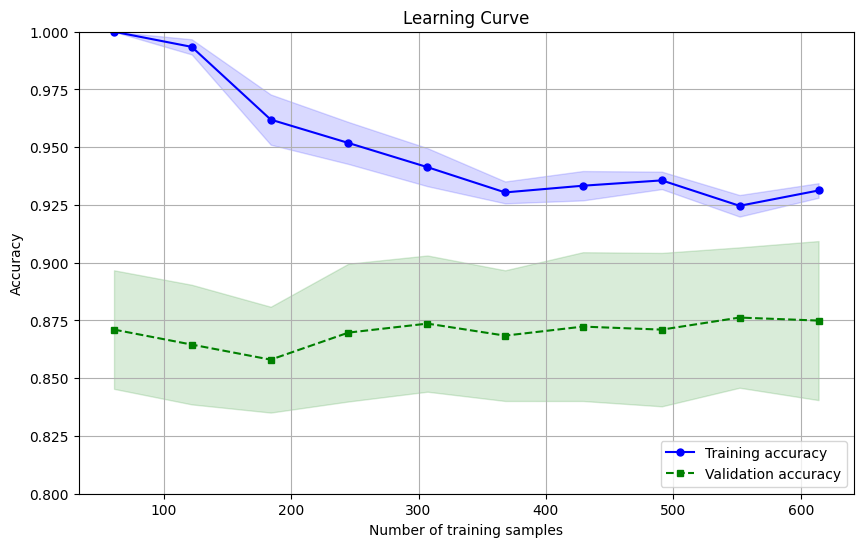

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Crear DataFrame sin las columnas PLAYER_NAME, WINS, TOP10, MONEY, FEDEX_POINTS
data_frame_winner = data_frame.drop(['PLAYER_NAME', 'WINS', 'TOP10', 'MONEY', 'FEDEX_POINTS','TOTAL_ROUNDS','AVG_TOTAL_FOR_ROUND'], axis=1)

# Definir características (X) y columna objetivo (y)
X = data_frame_winner.drop('WINNER', axis=1)
y = data_frame_winner['WINNER']

# Crear el modelo Random Forest con regularización (limitando max_depth)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)

# Calcular curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular la media y desviación estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()


In [105]:
# VAMOS A PROBAR CON SVM

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import RFE
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suprimir los mensajes de aviso de métricas indefinidas
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Crear DataFrame sin las columnas PLAYER_NAME, WINS, TOP10, MONEY, FEDEX_POINTS
data_frame_winner = data_frame.drop(['PLAYER_NAME', 'WINS', 'TOP10', 'MONEY', 'FEDEX_POINTS','TOTAL_ROUNDS','AVG_TOTAL_FOR_ROUND'], axis=1)

# Definir características (X) y columna objetivo (y)
X = data_frame_winner.drop('WINNER', axis=1)
y = data_frame_winner['WINNER']

# Dividir los datos en conjuntos de entrenamiento y prueba con muestreo estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Crear el modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular y mostrar la accuracy en conjunto de entrenamiento y prueba
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)
print("Accuracy on training set: {:.2f}".format(train_accuracy))
print("Accuracy on test set: {:.2f}".format(test_accuracy))

# Imprimir el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calcular el valor de ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)



Accuracy on training set: 0.84
Accuracy on test set: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       132
           1       0.00      0.00      0.00        22

    accuracy                           0.86       154
   macro avg       0.43      0.50      0.46       154
weighted avg       0.73      0.86      0.79       154

ROC AUC Score: 0.5


Vemos como empeoran los datos respecto al Random Forest ya que el accuracy del train y del test son altos, pero el ROC es como si la SVC no distinguiera clases, y tirara una moneda al aire para determinar a que clase pertenece cada dato. Por todo ello, NOS QUEDAMOS CON EL MODELO RANDOM FOREST

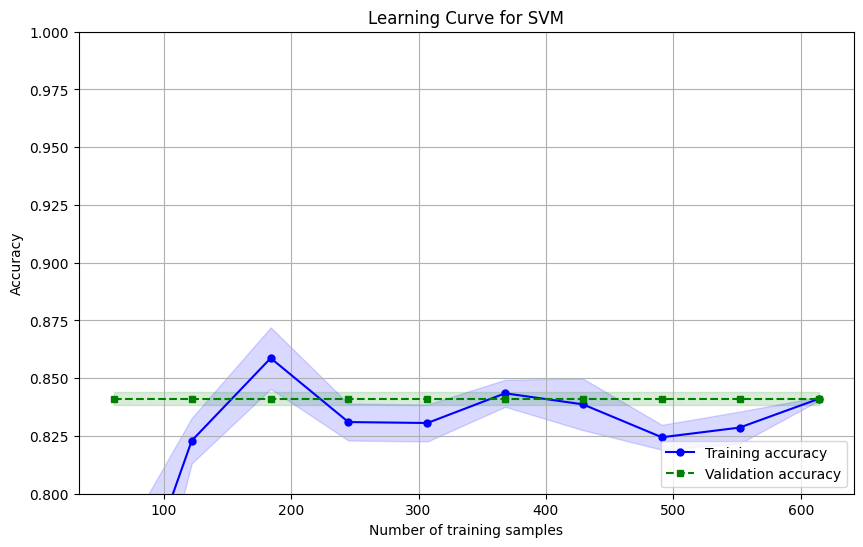

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Crear DataFrame sin las columnas PLAYER_NAME, WINS, TOP10, MONEY, FEDEX_POINTS
data_frame_winner = data_frame.drop(['PLAYER_NAME', 'WINS', 'TOP10', 'MONEY', 'FEDEX_POINTS','TOTAL_ROUNDS','AVG_TOTAL_FOR_ROUND'], axis=1)

# Definir características (X) y columna objetivo (y)
X = data_frame_winner.drop('WINNER', axis=1)
y = data_frame_winner['WINNER']

# Crear el modelo SVM con parámetros de regularización (C)
svm_model = SVC(C=1.0, kernel='rbf', random_state=42)

# Calcular curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular la media y desviación estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()


MODELO REGRESION VS MODELO CALSIFICACION

En los ejercicios realizados, la elección entre utilizar modelos de clasificación o modelos de regresión depende en gran medida de la naturaleza de los datos y del objetivo que estamos tratando de lograr.

En los primeros analisis hemos usado Modelos de Regresión por varios motivos:

Naturaleza Numérica del Objetivo: Los modelos de regresión son adecuados cuando tu objetivo es predecir un valor numérico continuo. Si estamos interesados en la prediccion del numero de victroias de un jugador es el correcto

Interpolación de Valores Intermedios: Los modelos de regresión son útiles cuando deseamos predecir valores en un rango continuo. Pueden predecir valores entre los valores observados y se puede realizar interpolación.

Despues lo intentamos con modelos de clasificacion:

Naturaleza Binaria o Multiclase del Objetivo: Los modelos de clasificación son adecuados cuando el objetivo es predecir una variable categórica, como una etiqueta de clase. En nuestro caso al trtatar de predecir si un jugador ha ganado alguna vez (clase positiva) o no (clase negativa)

Evaluación de Probabilidades: Los modelos de clasificación también pueden proporcionar probabilidades de pertenencia a cada clase, lo que puede ser útil para tomar decisiones basadas en la confianza del modelo en sus predicciones. 

Interpretación Directa: Las predicciones de los modelos de clasificación son directamente interpretables como etiquetas de clase, lo que puede ser útil en aplicaciones donde necesitamos saber a qué clase pertenece cada instancia.

En nuestro caso concreto, obtuvimos mejores resultados con modelos de clasificación en lugar de modelos de regresión. Esto podría deberse a varias razones:

Discretización Natural: La creación de la columna "Winner" (jugador ganador o no) podría haber convertido naturalmente el problema en una tarea de clasificación binaria. Esto simplifica el problema y permite que los modelos de clasificación funcionen mejor.

Estructura de los Datos: Puede haber características o patrones en tus datos que hacen que un modelo de clasificación sea más efectivo en este contexto particular.

Capacidad de Generalización: Los modelos de clasificación son más efectivos para identificar patrones generales en los datos que llevan a la victoria, en lugar de tratar de predecir un valor numérico específico de victorias.



